# Exploratory Data Analysis on Crop Production in India

* I will be analyzing the Agriculture Crop Production dataset and try to answer some
interesting questions. I have downloaded the dataset from Kaggle datasets.The libraries for
data analysis and visualization that I have used in this project are Numpy, Pandas,
Matplotlib and Seaborn

# Data Preparation and cleaning
* Load the file using Pandas
* Look at some information about the data
* Fix any missing values

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('C:\\Users\\Rajashekara Reddy\\Downloads\\Crop Production data.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
df.shape

(246091, 7)

In [6]:
df.sample(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
75727,Jharkhand,DEOGHAR,2006,Rabi,Arhar/Tur,20.12,32.0
160784,Puducherry,PONDICHERRY,2003,Whole Year,Tapioca,552.00,16566.0
25237,Assam,SIVASAGAR,2007,Kharif,Small millets,5.00,3.0
64740,Gujarat,TAPI,2008,Whole Year,Banana,400.00,36000.0
233049,Uttarakhand,DEHRADUN,2000,Kharif,Potato,246.00,6376.0


In [7]:
print(f'The Given dataset contain Rows is : {246091}')
print(f'The Given dataset contain Columns is : {7}')
print(f'The Given dataset size is : {1722637}')

The Given dataset contain Rows is : 246091
The Given dataset contain Columns is : 7
The Given dataset size is : 1722637


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [9]:
#statistical info about dataset
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [10]:
#checking the null values
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [11]:
# Dropping the sample having missing data
df.dropna(subset=['Production'], axis=0, inplace=True)

In [12]:
df.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [13]:
df.shape

(242361, 7)

# Exploratory Analysis and Visualization
## Univarate Analysis

In [14]:
# STATES
states = df.State_Name.str.strip().unique()
states

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [15]:
len(states)

33

In [16]:
df.State_Name.value_counts()

State_Name
Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                    

* We have data from 33 states (including union territories).
* We have more data from top agriculture rich states like Uttar Pradesh, Madhya
Pradesh and Karnataka than other states.

<Axes: >

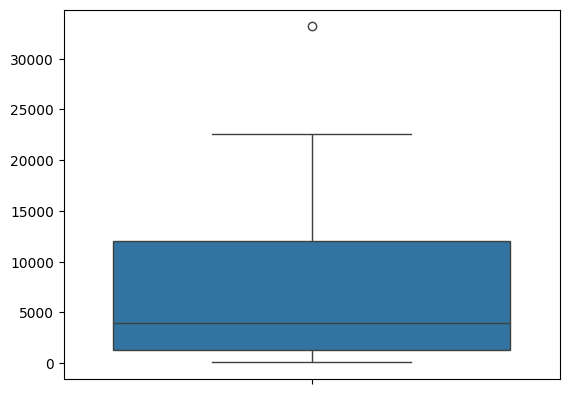

In [17]:
#creating boxplot for analysis
sns.boxplot(df.State_Name.value_counts().values)

* From above chart we have one state as outlier from 33 states which is uttar pradesh

In [18]:
#District
print(len(df.District_Name.unique()))
df.District_Name.unique()


646


array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [19]:
df.District_Name.value_counts()

District_Name
TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: count, Length: 646, dtype: int64

<Axes: >

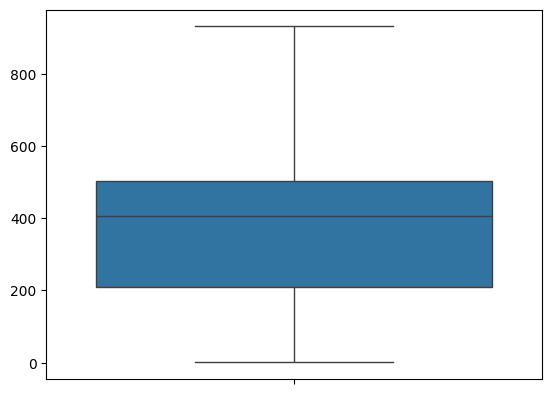

In [20]:
sns.boxplot(df.District_Name.value_counts().values)


In [21]:
# CROP YEARS
print(df.Crop_Year.unique())
print(df.Crop_Year.nunique())
print(df.Crop_Year.min())
print(df.Crop_Year.max())

[2000 2001 2002 2003 2004 2005 2006 2010 1997 1998 1999 2007 2008 2009
 2011 2012 2013 2014 2015]
19
1997
2015


In [22]:
df.Crop_Year.value_counts()

Crop_Year
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: count, dtype: int64

* We have data of 19 years from 1997 to 2015.
* The years having more data are - 2003, 2002, 2007, 2008 and 2006


In [23]:
# Season
print(df.Season.nunique())
df.Season = df.Season.str.strip()

6


In [24]:
Seasons = df.Season.unique()
Seasons

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [27]:
print(df.Season.max())
print(df.Season.min())

Winter
Autumn


In [28]:
df.Season.value_counts()

Season
Kharif        94283
Rabi          66160
Whole Year    56127
Summer        14811
Winter         6050
Autumn         4930
Name: count, dtype: int64

* More crop yieldings are in seasons Kharif and Rabi

<Axes: >

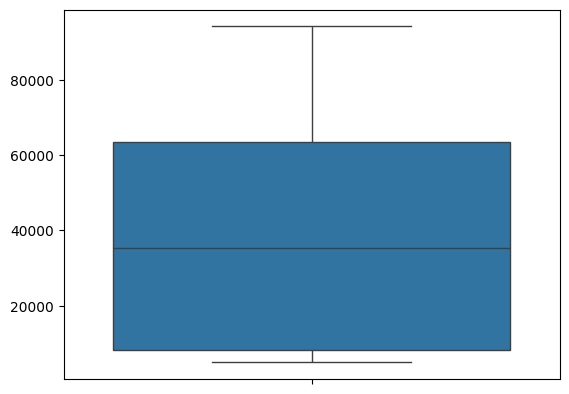

In [29]:
sns.boxplot(df.Season.value_counts().values)

In [30]:
#Crop
print(df.Crop.nunique())
df.Crop.unique()

124


array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [32]:
df.Crop.value_counts().head(25)

Crop
Rice                     15082
Maize                    13787
Moong(Green Gram)        10106
Urad                      9710
Sesamum                   8821
Groundnut                 8770
Wheat                     7878
Sugarcane                 7827
Rapeseed &Mustard         7533
Arhar/Tur                 7476
Gram                      7227
Jowar                     6990
Onion                     6984
Potato                    6914
Dry chillies              6421
Sunflower                 5483
Bajra                     5379
Small millets             4593
Peas & beans (Pulses)     4447
Cotton(lint)              4382
Linseed                   4351
Turmeric                  4168
Masoor                    4152
Sweet potato              4122
Barley                    4116
Name: count, dtype: int64

<Axes: >

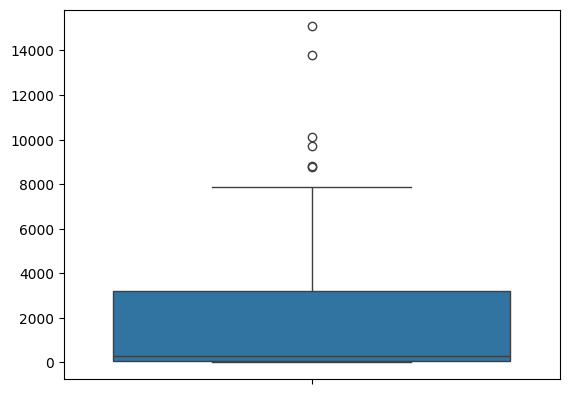

In [33]:
sns.boxplot(df.Crop.value_counts().values)

In [34]:
# Area
print(df.Area.max())
print(df.Area.min())


8580100.0
0.1


<Axes: ylabel='Area'>

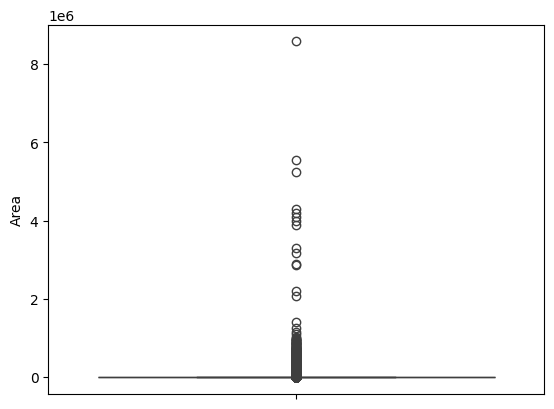

In [35]:
sns.boxplot(df.Area)

In [37]:
#Production
df.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

<Axes: ylabel='Production'>

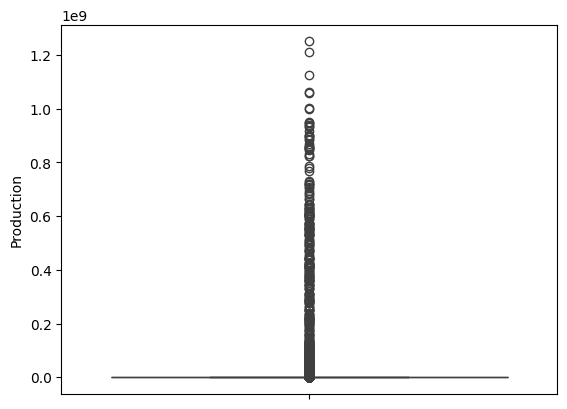

In [38]:
sns.boxplot(df.Production)

In [39]:
#Total Production
df['Total Production'] = df['Production'] * df['Area']
df['Total Production']

0         2.508000e+06
1         2.000000e+00
2         3.274200e+04
3         1.128160e+05
4         1.188000e+05
              ...     
246086    2.451060e+05
246087    2.903010e+05
246088    5.265000e+06
246089    1.669041e+11
246090    1.540000e+04
Name: Total Production, Length: 242361, dtype: float64

In [45]:
#Remove Outliers
Q1= df["Total Production"].quantile(0.40)
Q3 =df["Total Production"].quantile (0.60)
IQR = Q3 - Q1
df =df[(df["Total Production"] >= Q1-1.5*IQR) & (df ["Total Production"]<= Q3+ 1.5*IQR)]
df["Total Production"]

1              2.0
2          32742.0
3         112816.0
4         118800.0
6           3600.0
            ...   
246078      2560.0
246079       144.0
246082      1998.0
246083     24860.0
246090     15400.0
Name: Total Production, Length: 108174, dtype: float64

(array([122699.,  11178.,   6477.,   4636.,   3380.,   2853.,   2178.,
          2007.,   1683.,   1531.]),
 array([      0. ,  510571.6, 1021143.2, 1531714.8, 2042286.4, 2552858. ,
        3063429.6, 3574001.2, 4084572.8, 4595144.4, 5105716. ]),
 <BarContainer object of 10 artists>)

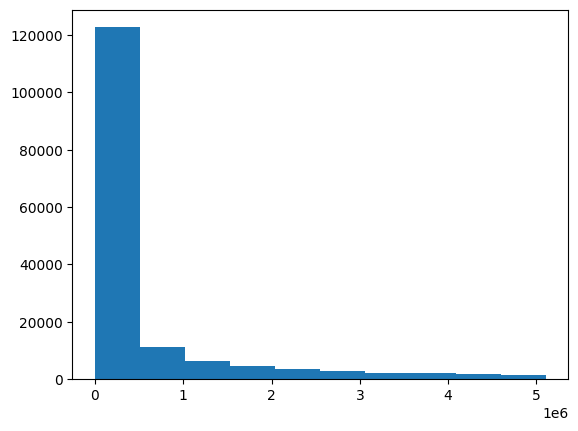

In [41]:
plt.hist(df['Total Production'])

<Axes: xlabel='Total Production', ylabel='Count'>

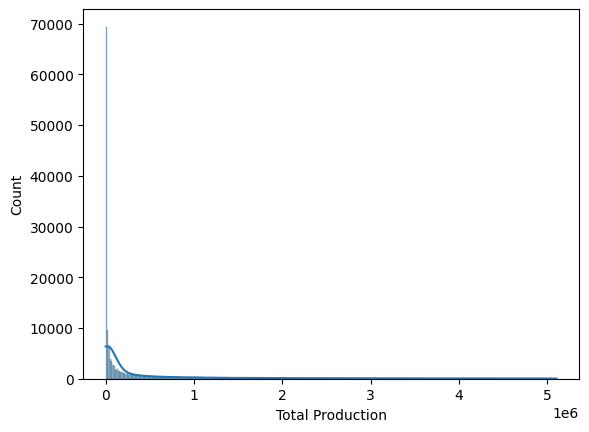

In [43]:
sns.histplot(df['Total Production'], kde = True)

In [91]:
#Productivity
df['Productivity'] = df['Production'] / df['Area']
df['Productivity']

1         0.500000
4         0.229167
11        0.500000
13        0.267038
16        1.000000
            ...   
246078    0.625000
246079    1.000000
246082    0.685185
246083    0.513636
246090    0.502857
Name: Productivity, Length: 76725, dtype: float64

In [46]:
Q1 =df ["Productivity"].quantile (0.40)
Q3 =df["Productivity"].quantile (0.60)
IQR= Q3-Q1
df=df[(df["Productivity"] >= Q1 -1.5*IQR) & (df ["Productivity"] <= Q3+ 1.5*IQR)]
df['Productivity']

1         0.500000
4         0.229167
11        0.500000
13        0.267038
16        1.000000
            ...   
246078    0.625000
246079    1.000000
246082    0.685185
246083    0.513636
246090    0.502857
Name: Productivity, Length: 76725, dtype: float64

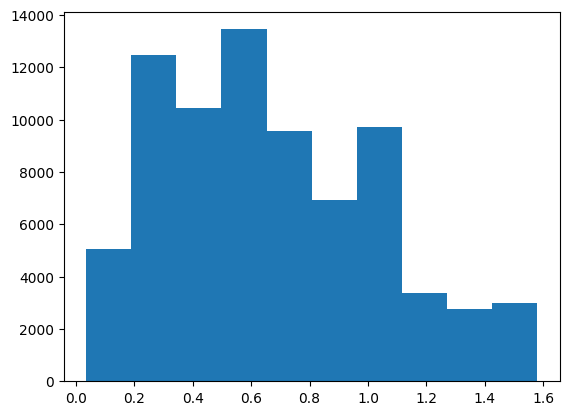

In [47]:
plt.hist(df['Productivity'])
plt.show()

<Axes: xlabel='Productivity', ylabel='Count'>

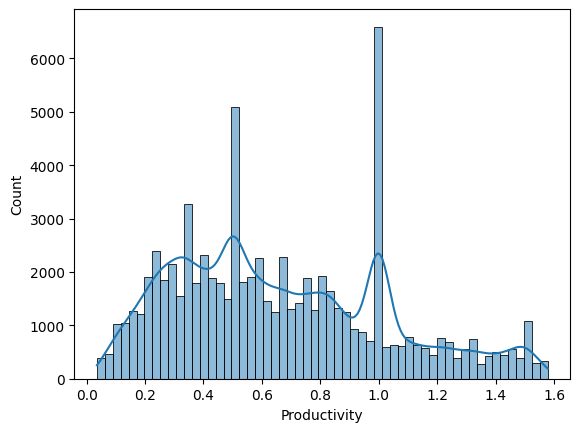

In [49]:
sns.histplot(df['Productivity'], kde = True)

In [50]:
# Area
df.Area

1           2.0
4         720.0
11          2.0
13        719.0
16          1.0
          ...  
246078     64.0
246079     12.0
246082     54.0
246083    220.0
246090    175.0
Name: Area, Length: 76725, dtype: float64

(array([5.5904e+04, 1.3883e+04, 5.0240e+03, 1.3610e+03, 3.7000e+02,
        1.1500e+02, 4.8000e+01, 1.1000e+01, 3.0000e+00, 6.0000e+00]),
 array([1.00000e-01, 2.18090e+02, 4.36080e+02, 6.54070e+02, 8.72060e+02,
        1.09005e+03, 1.30804e+03, 1.52603e+03, 1.74402e+03, 1.96201e+03,
        2.18000e+03]),
 <BarContainer object of 10 artists>)

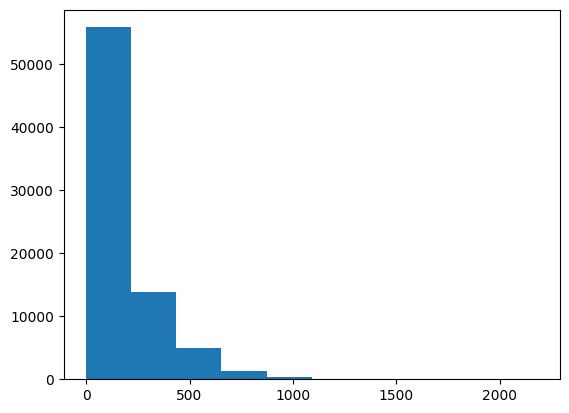

In [51]:
plt.hist(df['Area'])

<Axes: xlabel='Area', ylabel='Count'>

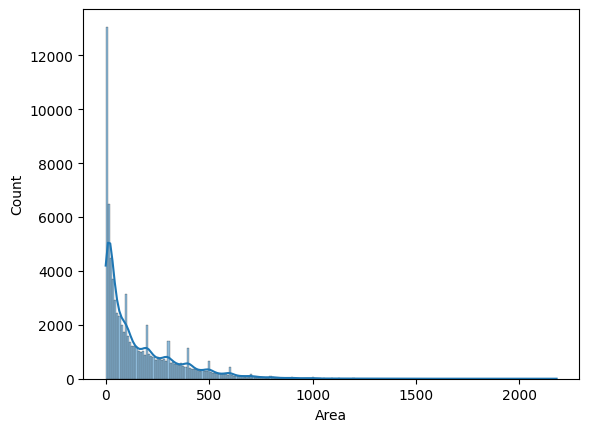

In [52]:
sns.histplot(df['Area'], kde = True)

In [53]:
df.Production

1           1.0
4         165.0
11          1.0
13        192.0
16          1.0
          ...  
246078     40.0
246079     12.0
246082     37.0
246083    113.0
246090     88.0
Name: Production, Length: 76725, dtype: float64

(array([40452., 14242.,  6940.,  6174.,  3326.,  2808.,  1319.,   996.,
          369.,    99.]),
 array([2.00000e-02, 5.56180e+01, 1.11216e+02, 1.66814e+02, 2.22412e+02,
        2.78010e+02, 3.33608e+02, 3.89206e+02, 4.44804e+02, 5.00402e+02,
        5.56000e+02]),
 <BarContainer object of 10 artists>)

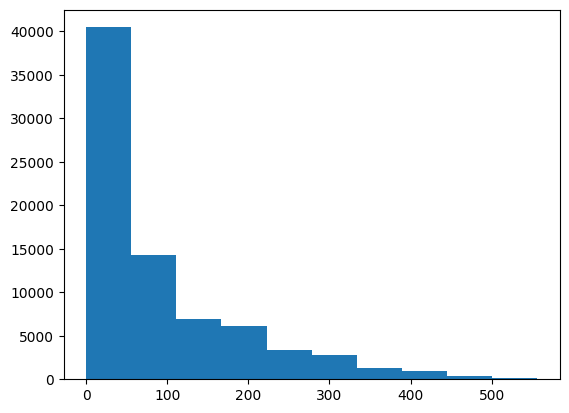

In [54]:
plt.hist(df['Production'])

<Axes: xlabel='Production', ylabel='Count'>

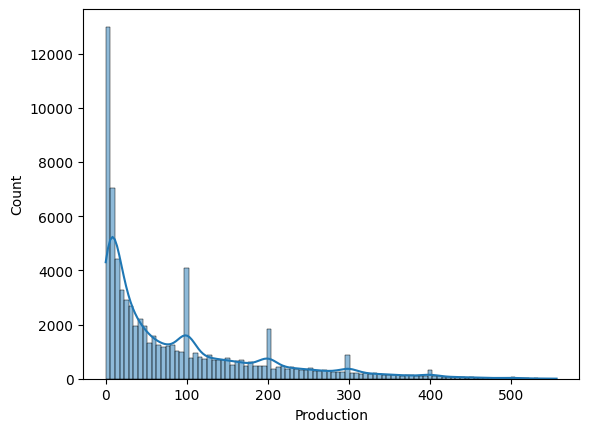

In [55]:
sns.histplot(df['Production'], kde=True)

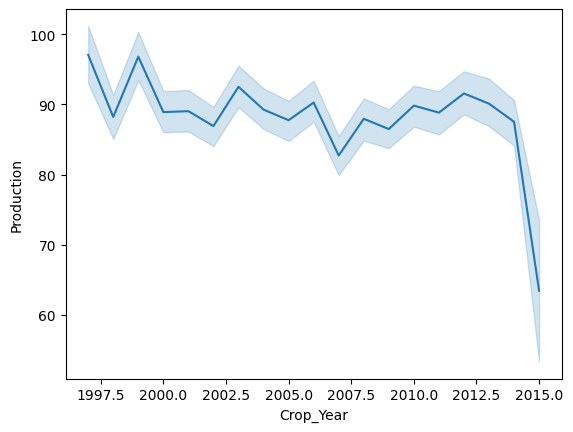

In [56]:
# crop production over the years
sns.lineplot(x='Crop_Year', y='Production', data = df)
plt.show()

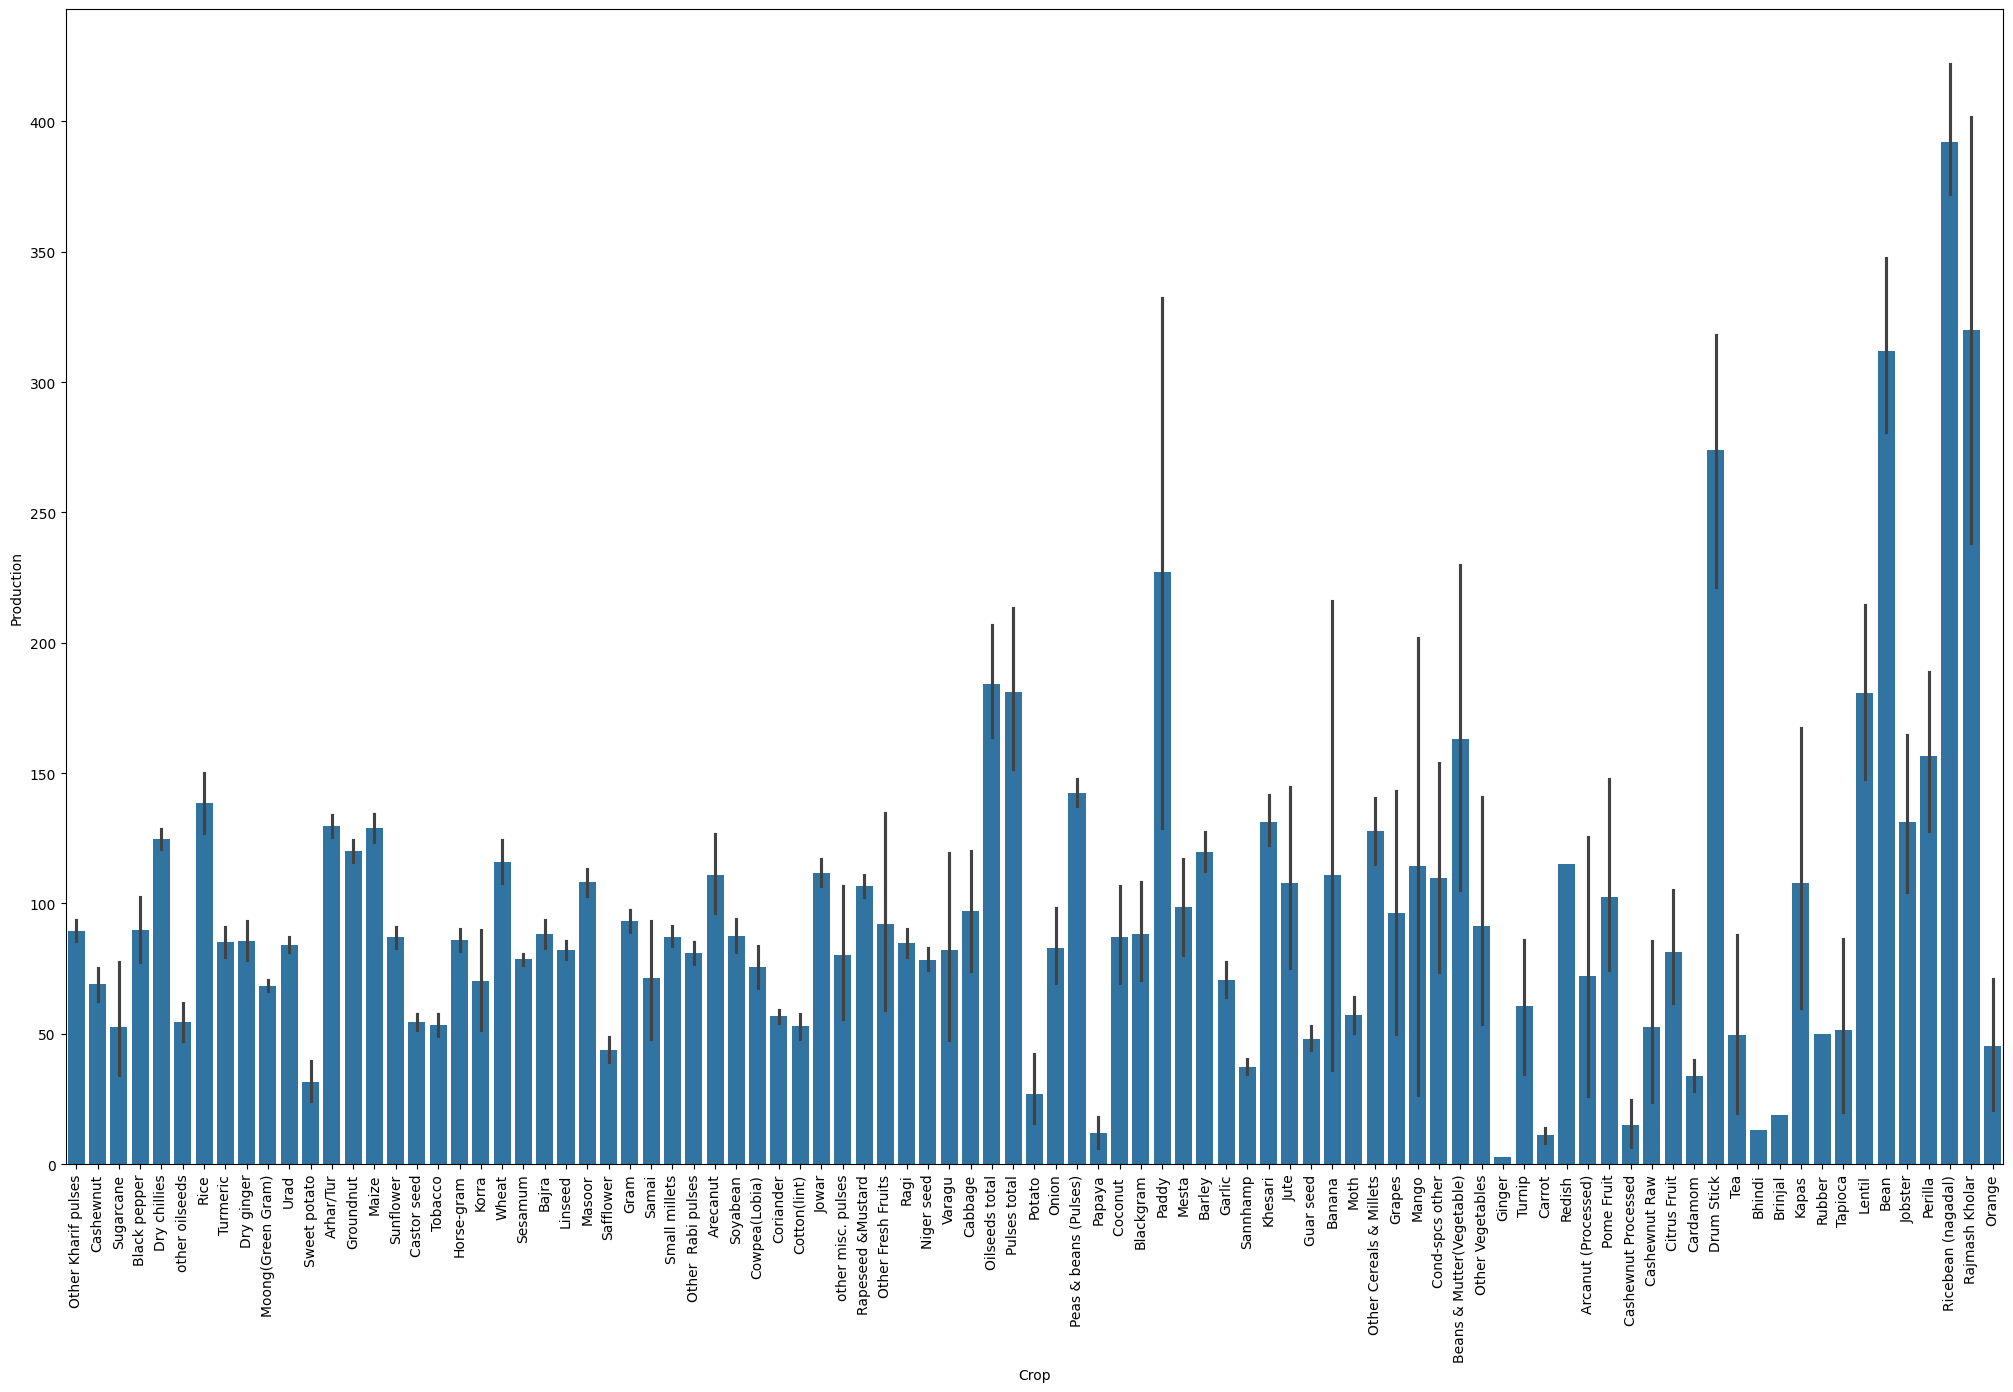

In [57]:
#crop production by crop
plt.figure(figsize=(25,15))
sns.barplot(x='Crop', y='Production', data = df)
plt.xticks(rotation = 90)
plt.show()

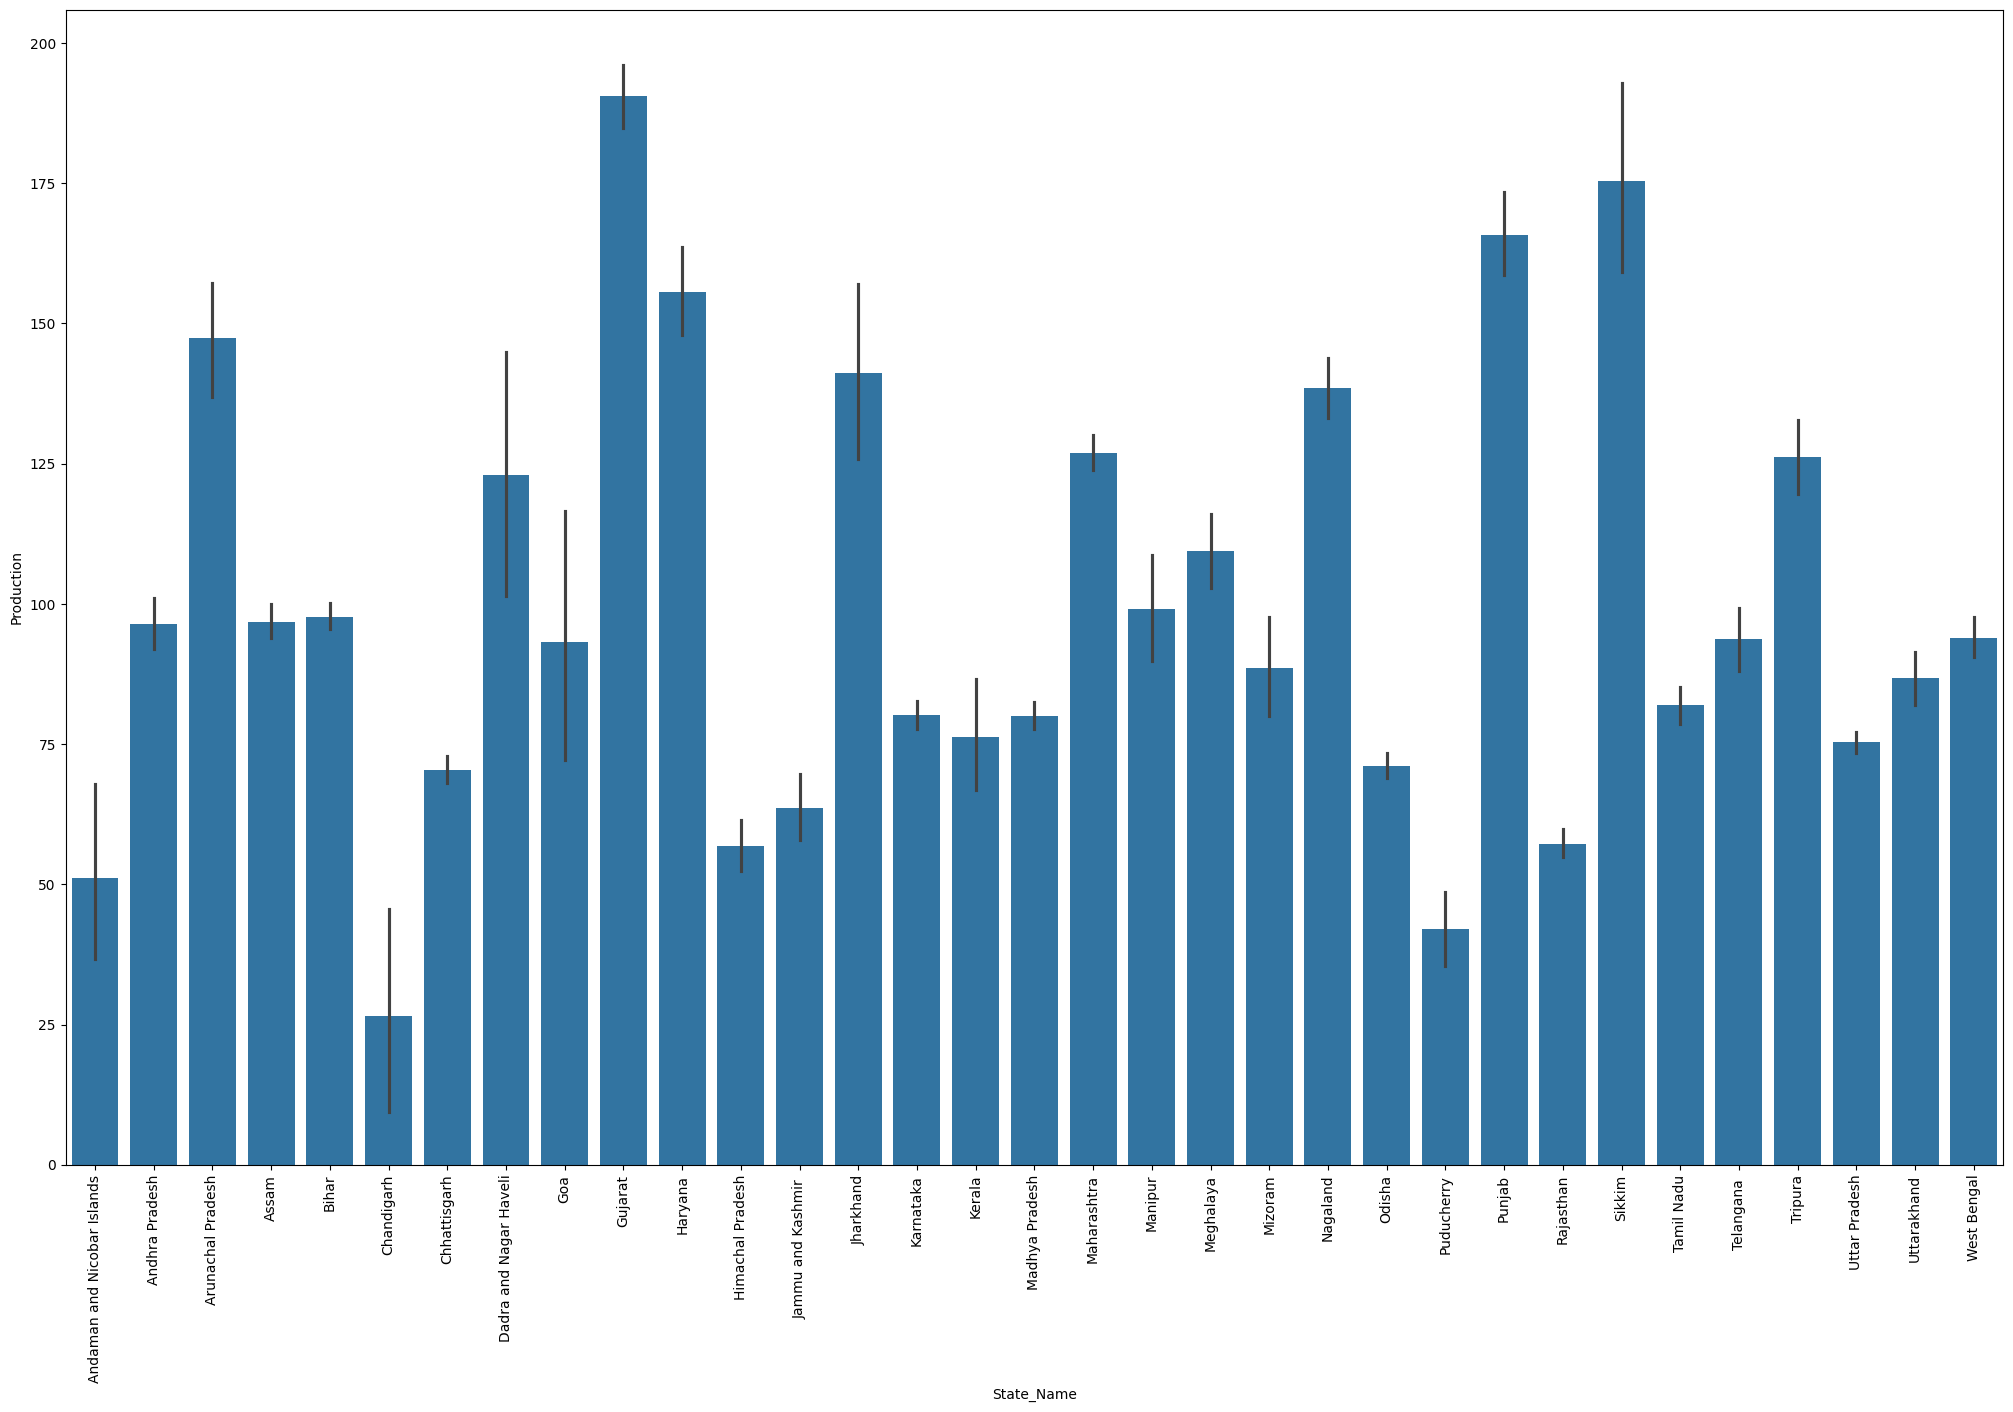

In [58]:
# crop production by state
plt.figure(figsize=(25,15))
sns.barplot(x='State_Name', y='Production', data = df)
plt.xticks(rotation = 90)
plt.show()

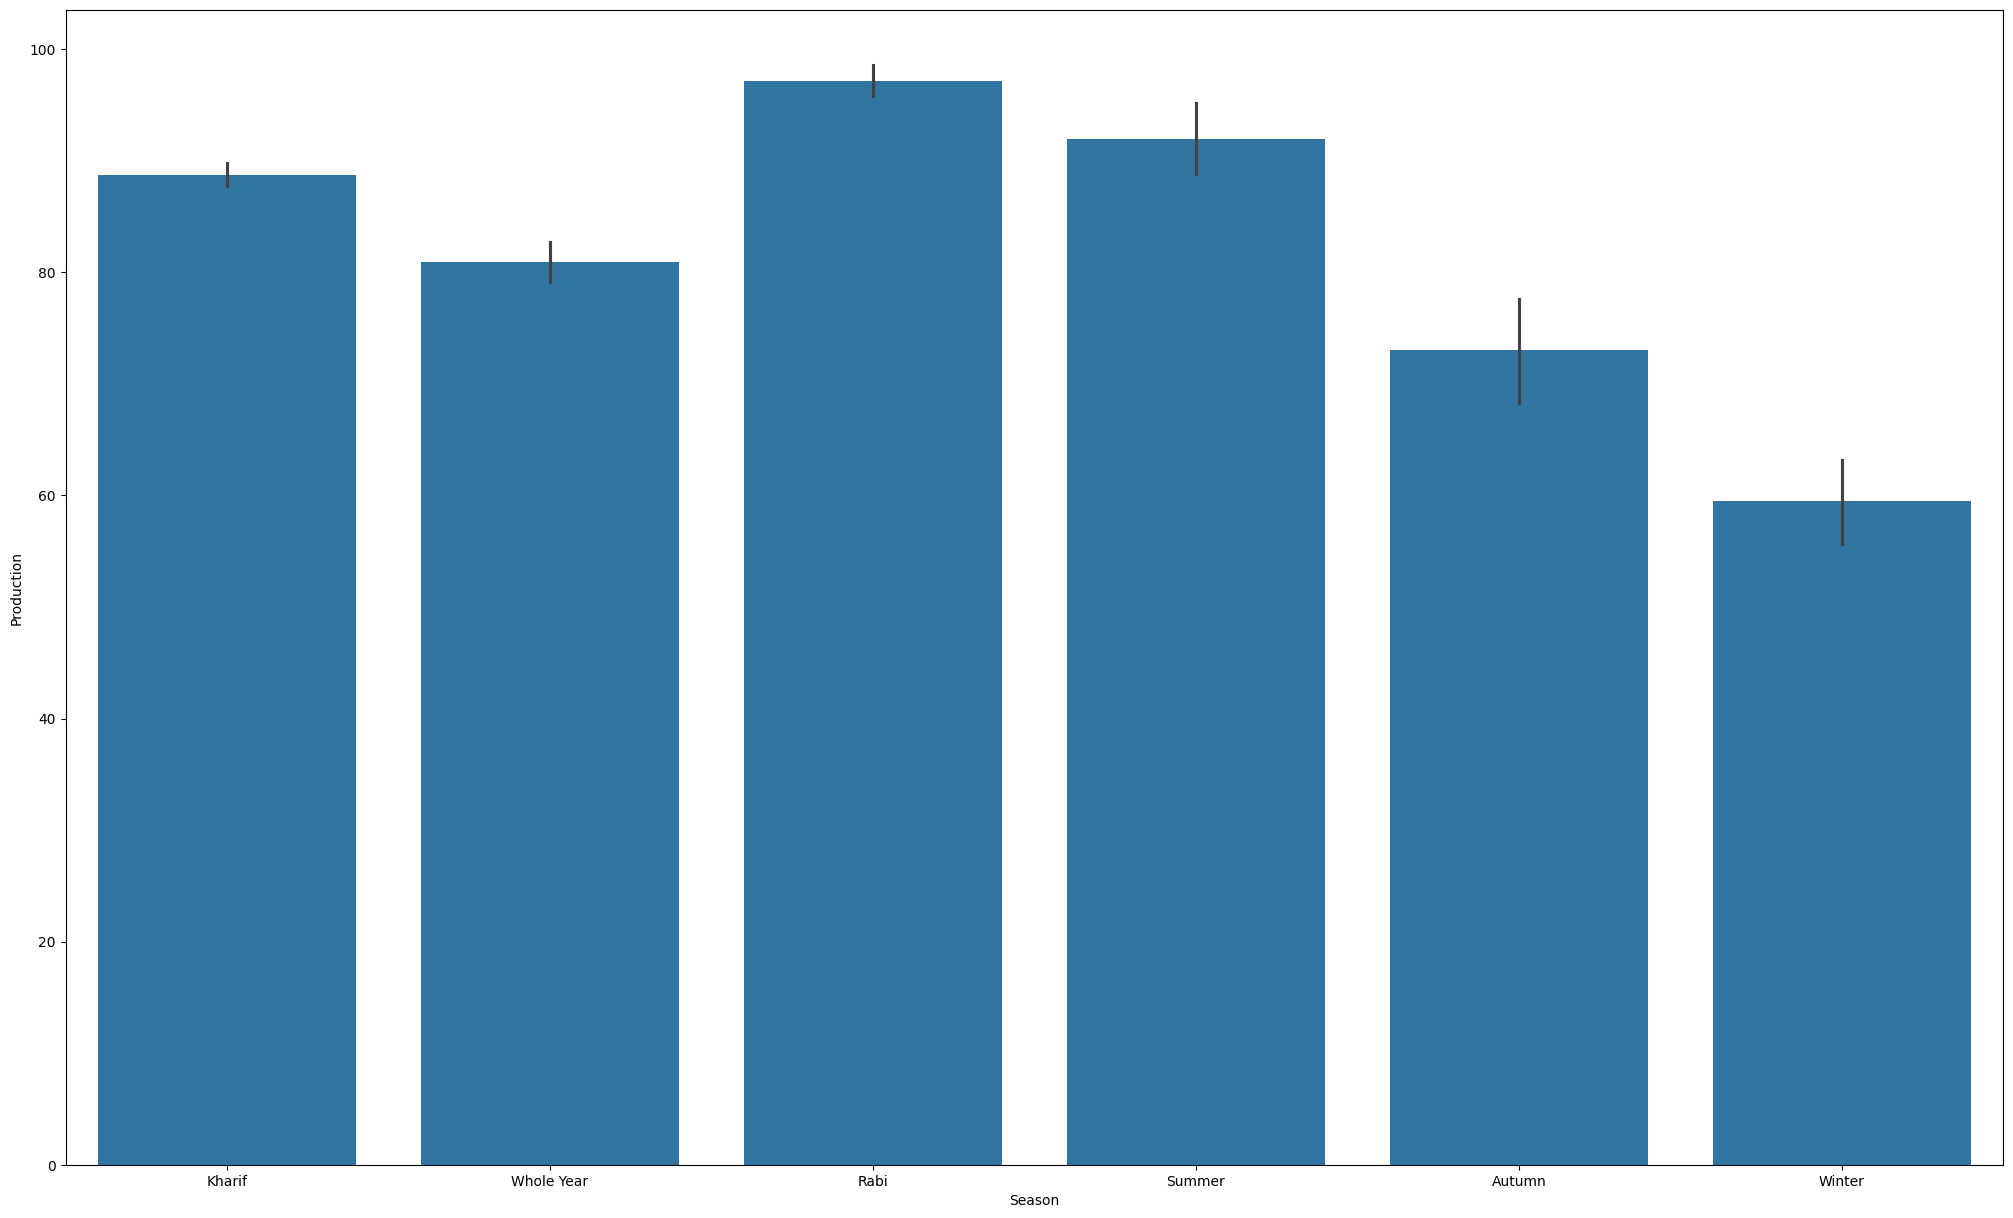

In [59]:
#crop production by season
plt.figure(figsize=(25,15))
sns.barplot(x='Season', y='Production', data = df)
plt.show()

In [60]:
crop = df['Crop']

In [62]:
crop=df['Crop']
def crop_category(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df['crop_category']=df['Crop'].apply(crop_category)

In [63]:
df['crop_category'].value_counts()

crop_category
Pulses        17590
oilseeds      17461
Cereal        12464
spices         9539
Beans          4251
Nuts           4028
fibres         2978
Commercial     1393
Vegetables      965
Fruits          113
Name: count, dtype: int64

A new variable crop category is created

In [64]:
#Zone-Wise Production - 1997-2014
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [65]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

df['Zones'] = df.apply(get_zonal_names, axis=1)
df['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [66]:
df.Zones.value_counts()

Zones
East Zone       17230
North Zone      16114
South Zone      12082
Central Zone    11567
NE Zone         10591
West Zone        8623
Union Terr        518
Name: count, dtype: int64

<h3>Visualization on Important variables:</h3>

### State wise Production

In [67]:
prod = df.groupby(by = df.State_Name)['Production'].sum().reset_index()
prod

,State_Name,Production
0,Andaman and Nicobar Islands,3171.82
1,Andhra Pradesh,193777.00
2,Arunachal Pradesh,74407.00
3,Assam,515903.00
4,Bihar,737787.10
5,Chandigarh,531.50
6,Chhattisgarh,344363.00
7,Dadra and Nagar Haveli,13772.00
8,Goa,4942.58
9,Gujarat,267379.00


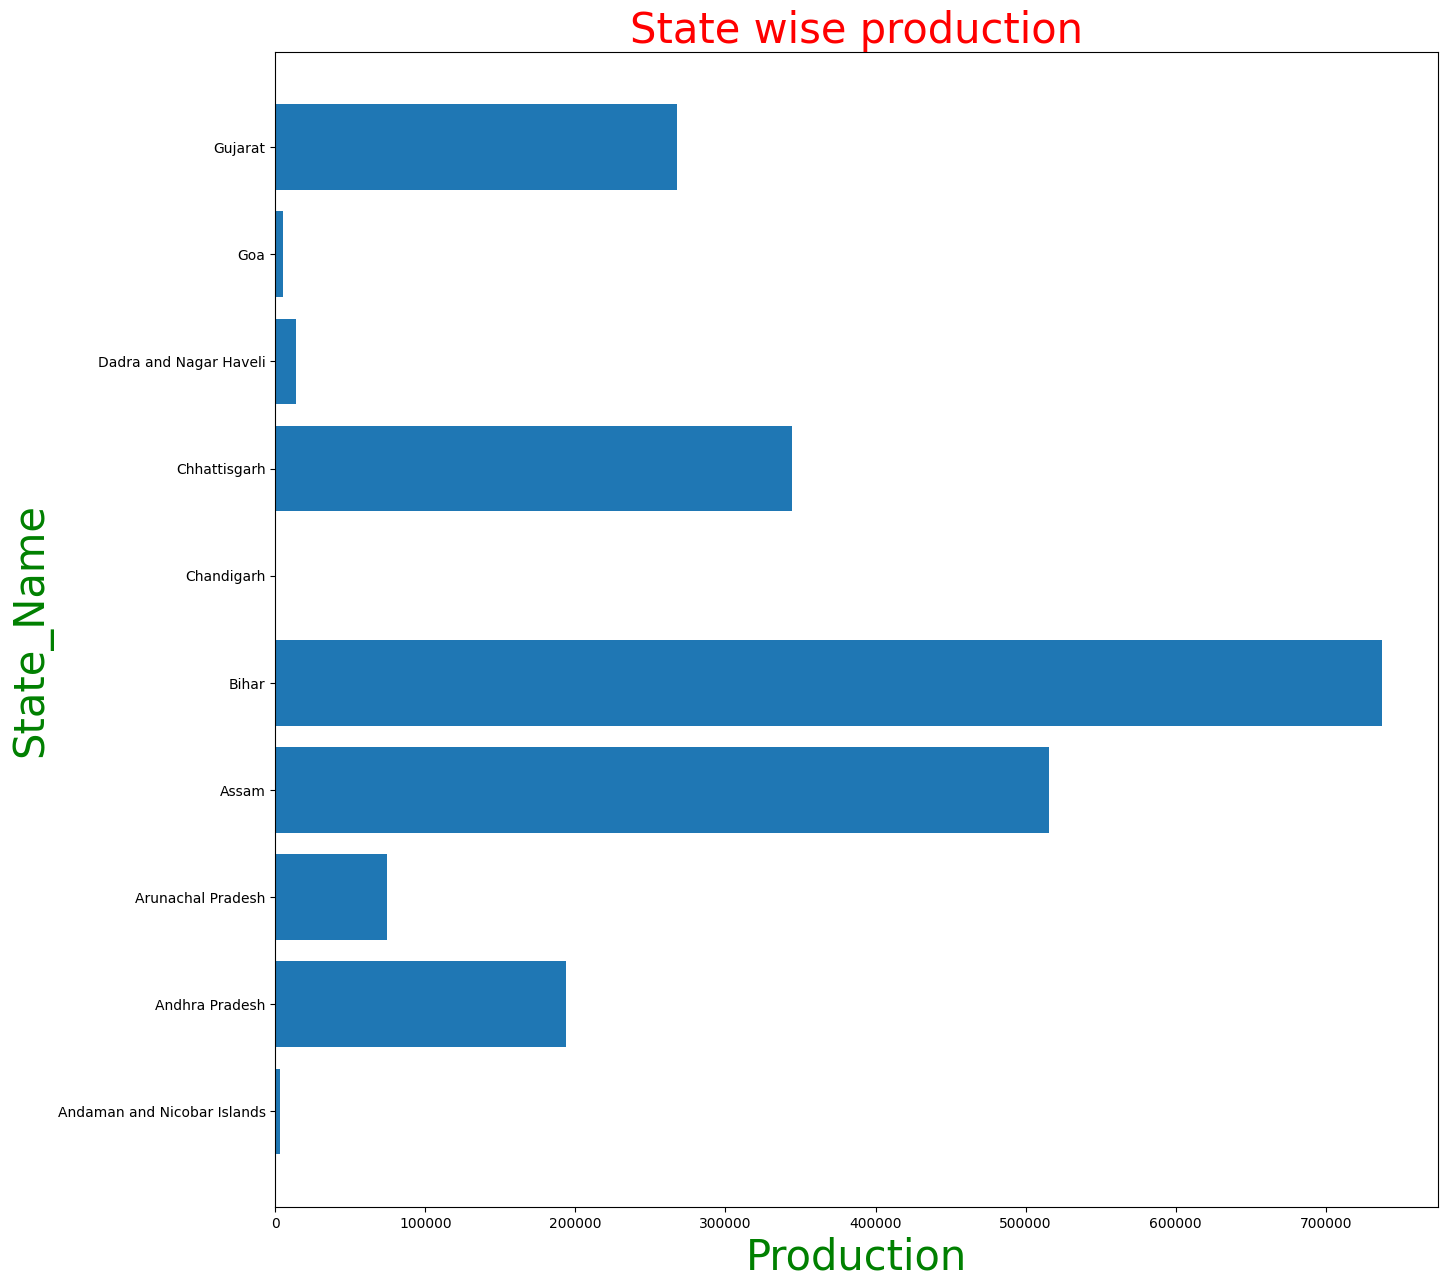

In [70]:
#Overall Crop Production
plt.figure(figsize=(15,15))
x = prod['Production'].head(10)
y = prod['State_Name'].head(10)
plt.barh( y,x)
plt.title('State wise production', fontsize= 30 , color = 'r')
plt.xlabel('Production', fontsize = 30 , color = 'g')
plt.ylabel('State_Name', fontsize = 30, color = 'g')
plt.show()

### Crop wise production

In [74]:
# TOP 10 CROPS BY PRODUCTION
crop1 = df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop1

,Crop,Production
47,Moong(Green Gram),405155.25
75,Sesamum,391416.96
32,Groundnut,385952.70
26,Dry chillies,382826.30
86,Urad,370728.27
2,Arhar/Tur,320742.52
60,Peas & beans (Pulses),281354.84
43,Maize,272587.01
30,Gram,246723.81
67,Rapeseed &Mustard,244777.30


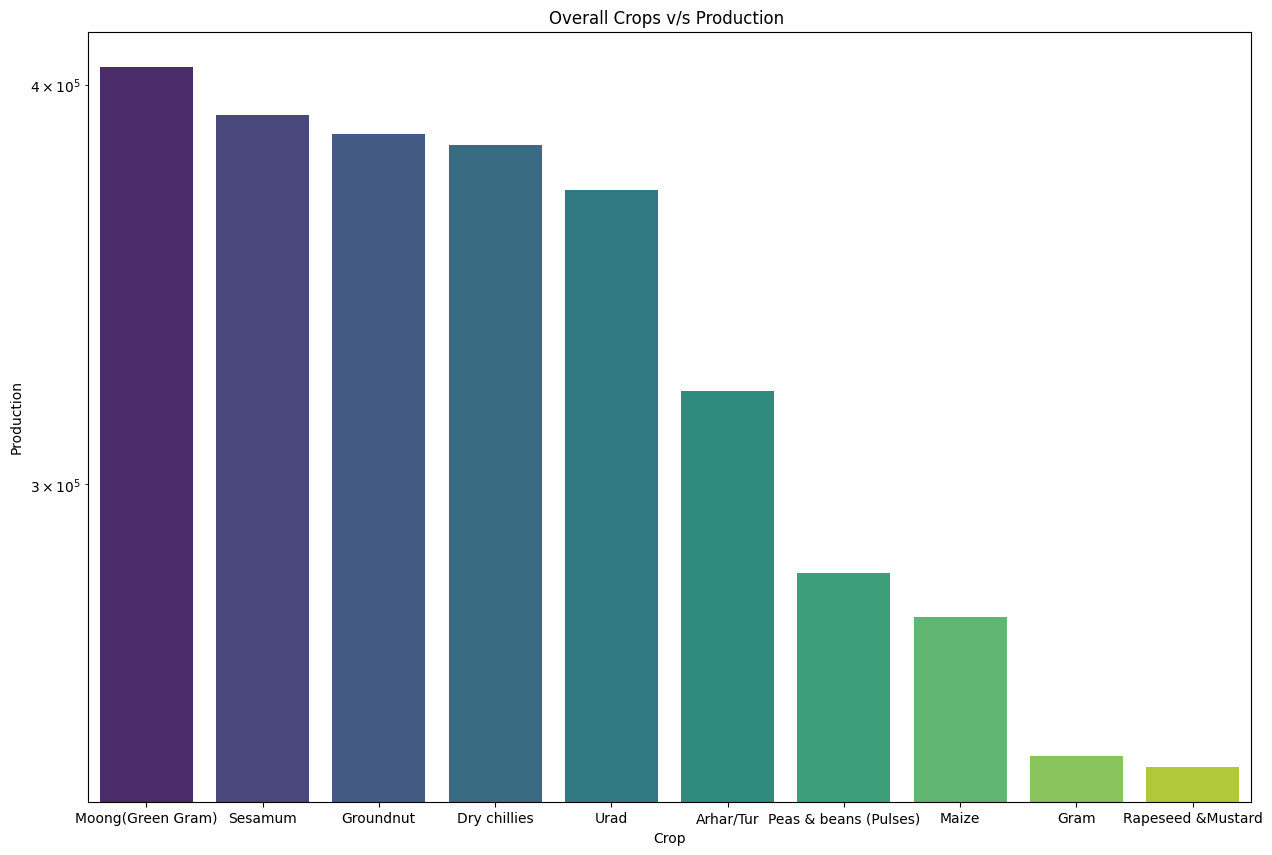

In [75]:
plt.figure(figsize=(15,10))
sns.barplot(x='Crop', y='Production', data = crop1,palette='viridis')
plt.yscale('log')
plt.title('Overall Crops v/s Production ')
plt.show()

### Year wise production

In [80]:
year_wise_prod = df.groupby(by='Crop_Year')['Production'].sum().reset_index()
year_wise_prod

,Crop_Year,Production
0,1997,240091.00
1,1998,306324.00
2,1999,356779.40
3,2000,390169.20
4,2001,374543.33
5,2002,422734.06
6,2003,429583.53
7,2004,407510.98
8,2005,394845.55
9,2006,412312.93


Text(0.5, 1.0, 'Crops Year vs Production')

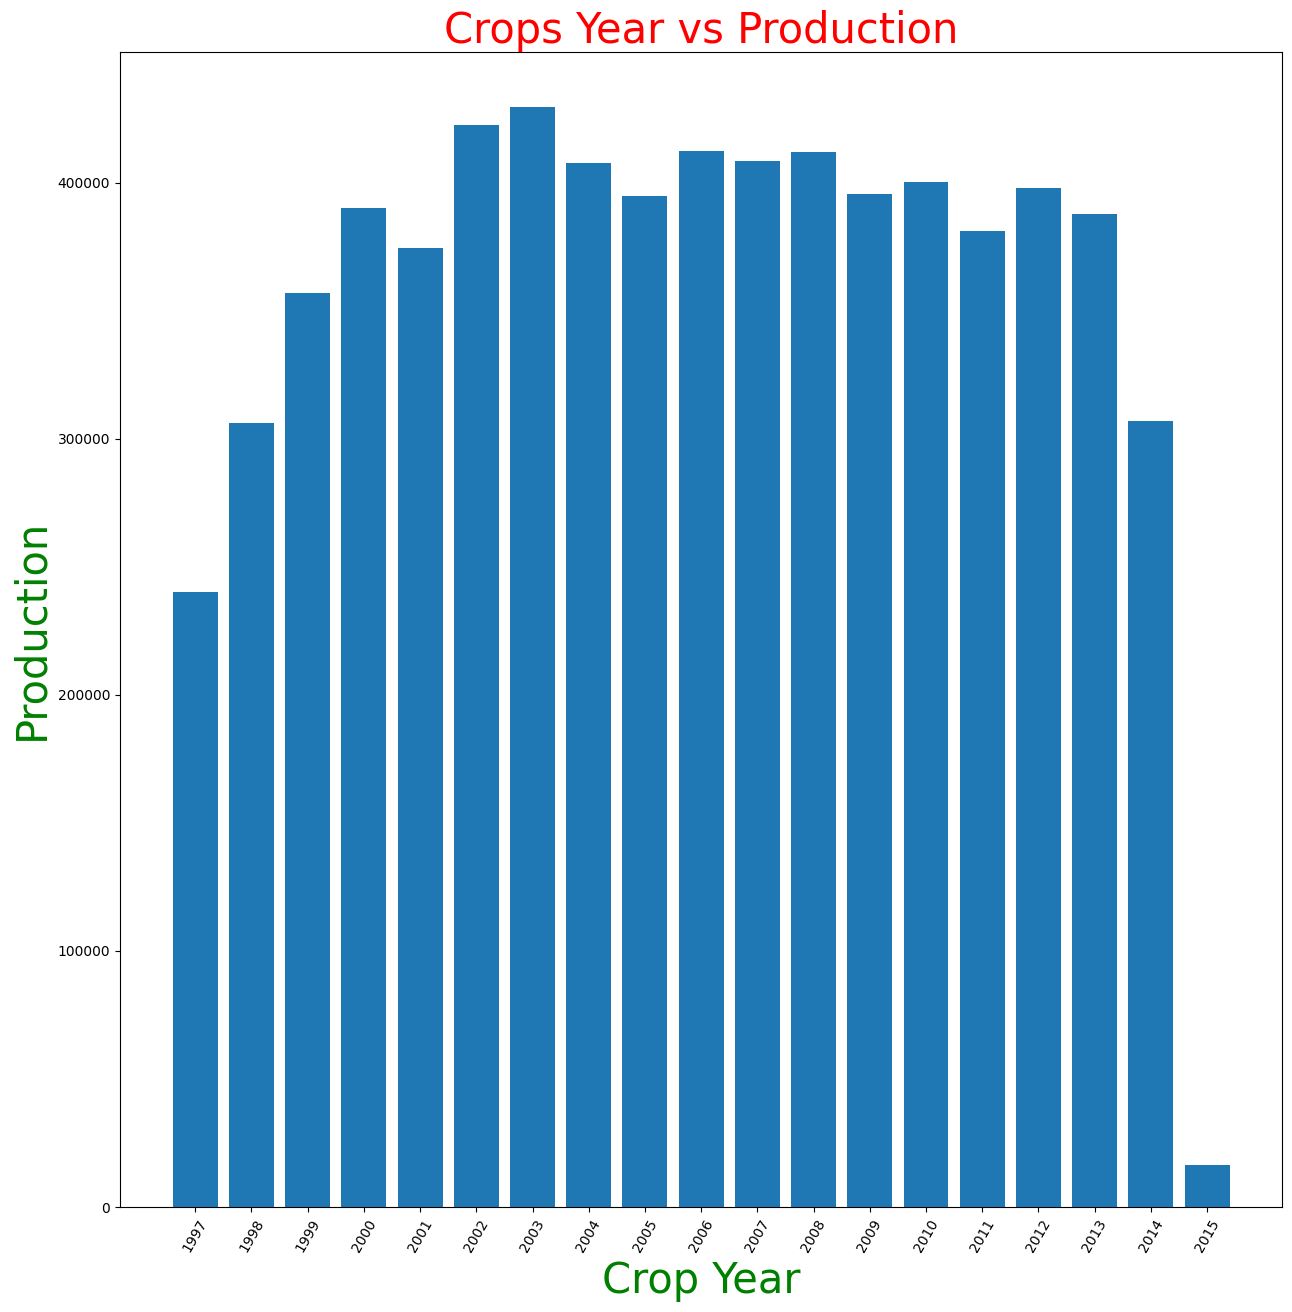

In [81]:
plt.figure(figsize=(15,15))
plt.bar(year_wise_prod.Crop_Year, year_wise_prod.Production, width=0.8)
plt.xticks(year_wise_prod.Crop_Year, rotation = 60)
plt.xlabel("Crop Year", fontsize = 30, color = 'g')
plt.ylabel("Production", fontsize = 30, color = 'g')
plt.title('Crops Year vs Production', fontsize = 30, color = 'r')

### Season wise production

In [82]:
season_wise_prod = df.groupby(by='Season')['Production'].sum().reset_index()
season_wise_prod

,Season,Production
0,Autumn,105275.46
1,Kharif,3007948.11
2,Rabi,2159816.47
3,Summer,428148.82
4,Whole Year,1040577.86
5,Winter,99105.40


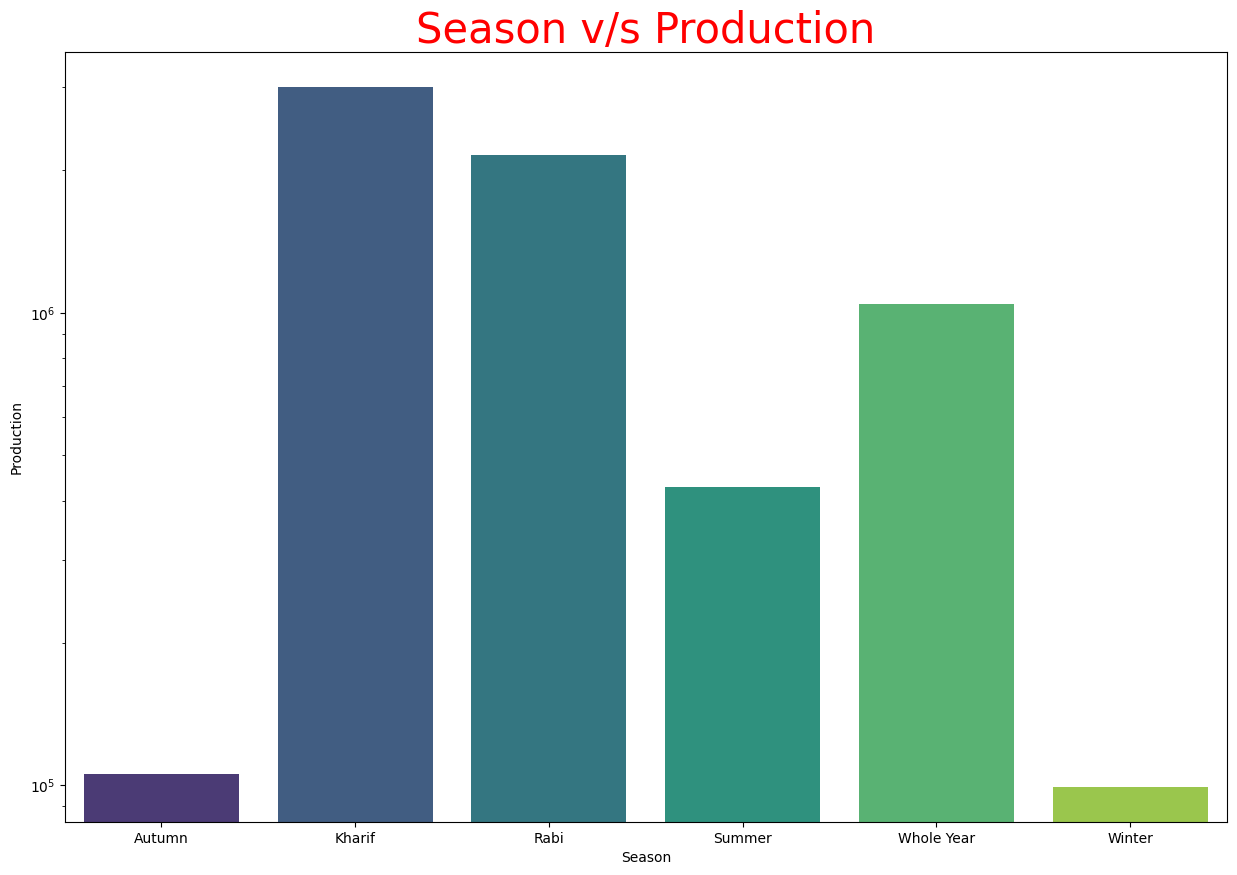

In [83]:
plt.figure(figsize=(15,10))
sns.barplot(x='Season', y='Production',data = season_wise_prod, palette='viridis')
plt.yscale('log')
plt.title('Season v/s Production', fontsize = 30,color = 'r')
plt.show()


### Category wise production

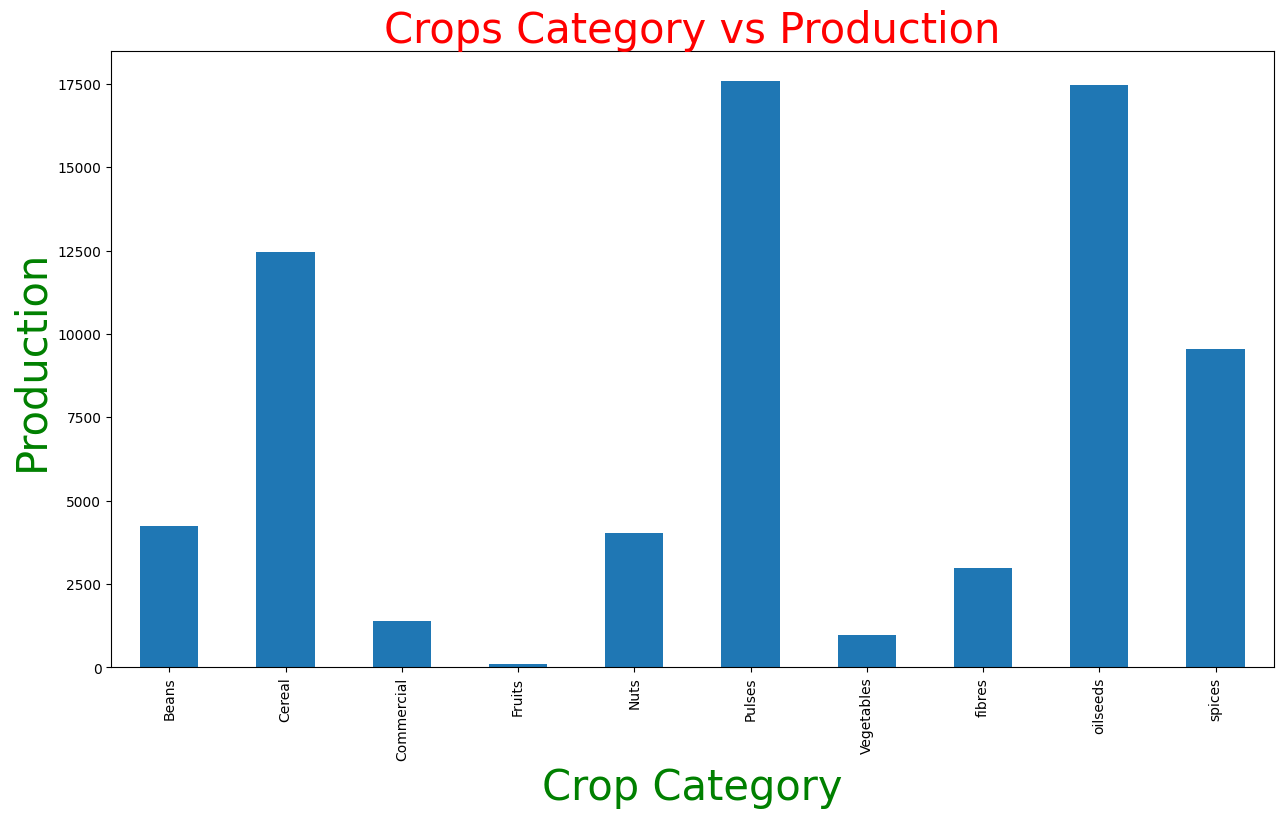

In [84]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
df.groupby("crop_category")["Production"].agg("count").plot.bar()
plt.xlabel("Crop Category", fontsize = 30, color = 'g')
plt.ylabel("Production", fontsize = 30, color = 'g')
plt.title('Crops Category vs Production', fontsize = 30, color = 'r')
plt.show()

### Different proportion of crop categories for india


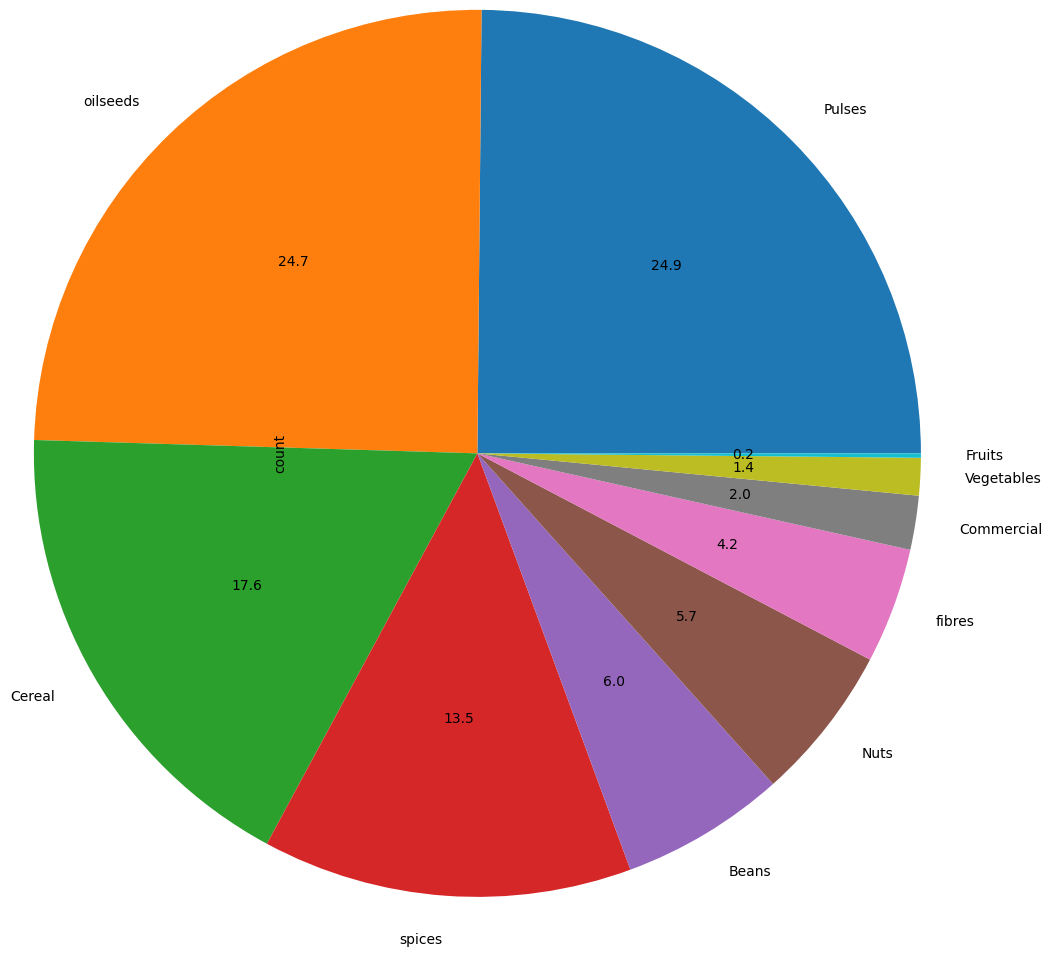

In [85]:
df1=df["crop_category"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)


## State wise crop production with different categories of crops

In [86]:
state_wise = pd.crosstab(df['State_Name'],df['crop_category'])
state_wise

crop_category,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,2,1,0,19,7,1,0,11,19
Andhra Pradesh,181,450,31,6,146,486,2,12,490,65
Arunachal Pradesh,15,113,1,0,26,35,7,0,160,148
Assam,0,833,399,1,15,1341,34,407,1366,625
Bihar,156,1528,102,0,125,1832,190,250,1466,1249
Chandigarh,0,0,0,0,0,14,0,0,3,0
Chhattisgarh,367,650,56,1,93,1131,71,280,855,953
Dadra and Nagar Haveli,0,44,0,0,7,19,0,13,28,1
Goa,0,22,0,0,3,16,0,0,0,12


## Questions and Answers to get insights

1. Which Crop is seen in high frequency and when
and where is it grown in India?

In [88]:
df.Crop.value_counts().head(10)

Crop
Moong(Green Gram)    5917
Sesamum              4979
Urad                 4404
Groundnut            3213
Dry chillies         3068
Coriander            2786
Sunflower            2784
Linseed              2732
Gram                 2644
Arhar/Tur            2471
Name: count, dtype: int64

In [92]:
rice_df = df[df['Crop'] == 'Rice']
rice_df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Total Production,Productivity,crop_category,Zones
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,3841.8558,1.370797,Cereal,Union Terr
10705,Arunachal Pradesh,KURUNG KUMEY,2013,Kharif,Rice,53.00,74.00,3922.0000,1.396226,Cereal,NE Zone
10711,Arunachal Pradesh,KURUNG KUMEY,2014,Kharif,Rice,53.00,74.00,3922.0000,1.396226,Cereal,NE Zone
16583,Assam,DIBRUGARH,1997,Summer,Rice,314.00,376.00,118064.0000,1.197452,Cereal,NE Zone
16802,Assam,DIBRUGARH,2005,Autumn,Rice,373.00,437.00,163001.0000,1.171582,Cereal,NE Zone
16861,Assam,DIBRUGARH,2007,Autumn,Rice,267.00,187.00,49929.0000,0.700375,Cereal,NE Zone
16890,Assam,DIBRUGARH,2008,Autumn,Rice,258.00,203.00,52374.0000,0.786822,Cereal,NE Zone
16919,Assam,DIBRUGARH,2009,Autumn,Rice,107.00,93.00,9951.0000,0.869159,Cereal,NE Zone
16948,Assam,DIBRUGARH,2010,Autumn,Rice,102.00,118.00,12036.0000,1.156863,Cereal,NE Zone
16979,Assam,DIBRUGARH,2011,Autumn,Rice,95.00,116.00,11020.0000,1.221053,Cereal,NE Zone


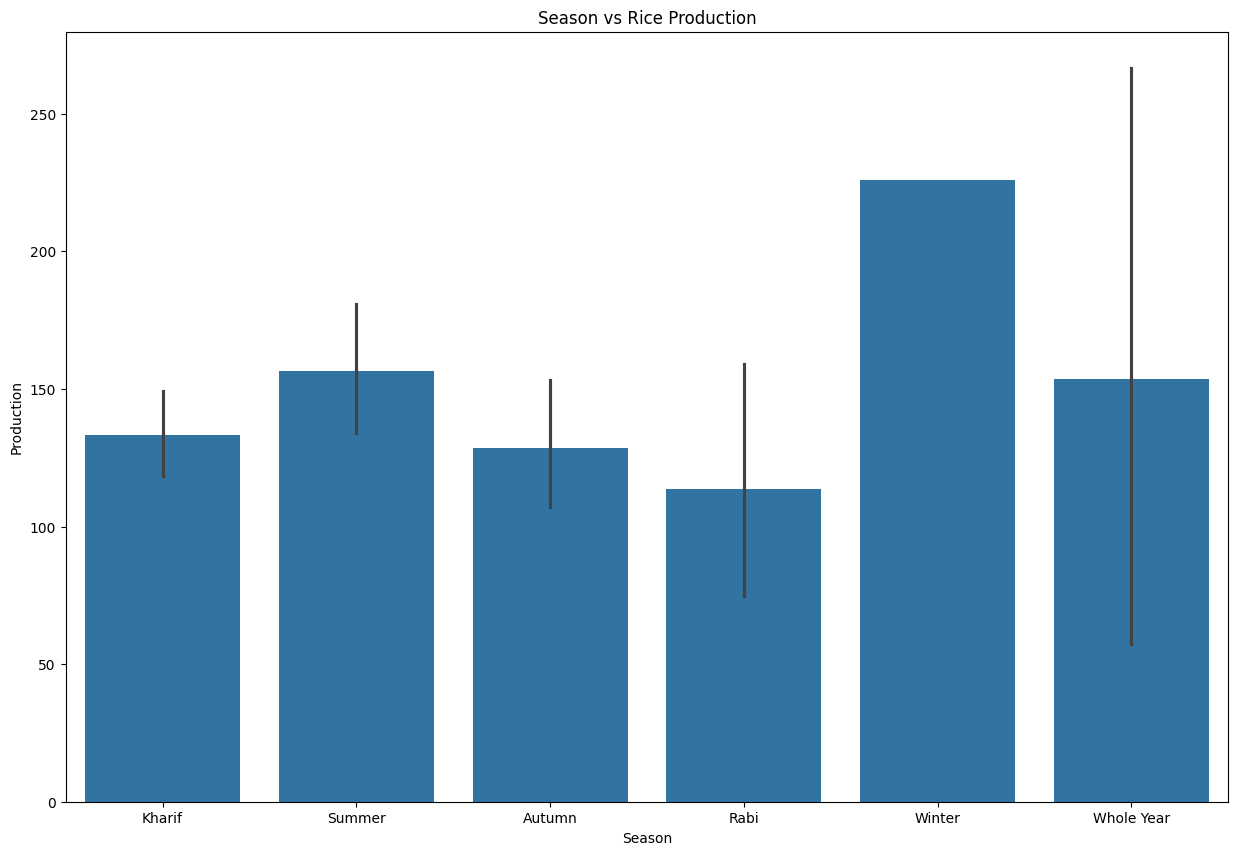

In [93]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="Season",y="Production",data=rice_df);
plt.title('Season vs Rice Production')
plt.show()


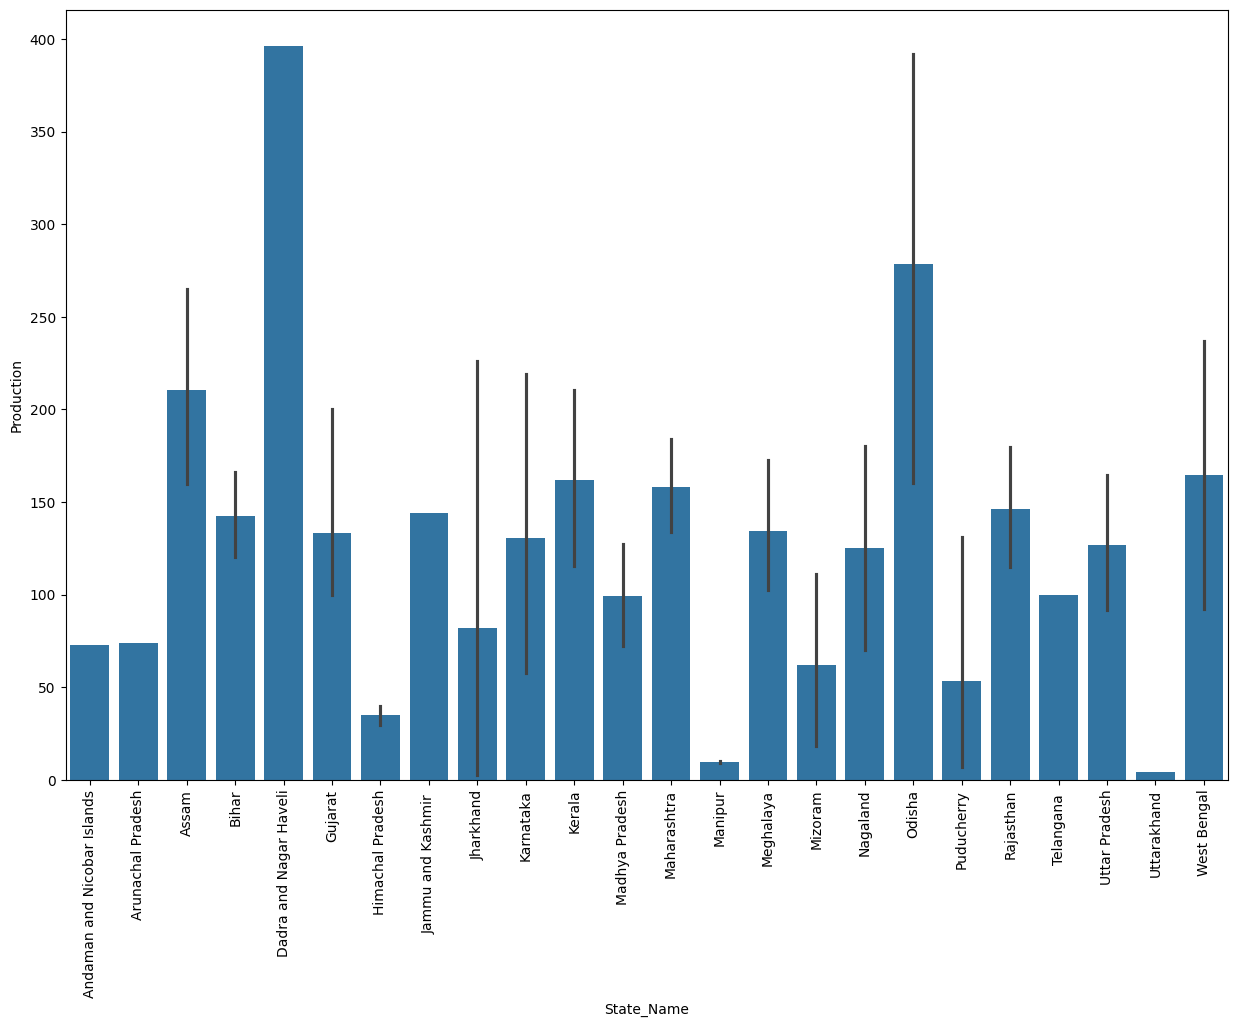

In [94]:
plt.figure(figsize=(15,10))
sns.barplot(x="State_Name",y="Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [98]:
rice_prod_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
sum_rice = rice_prod_dis["Production"].sum()
rice_prod_dis["Percent_of_Production"] = rice_prod_dis["Production"].map(lambda x:(x/sum_rice)*100)
rice_prod_dis.head(10)

,District_Name,Production,Percent_of_Production
75,KANNUR,2939.00,3.490304
13,BEGUSARAI,2726.00,3.237349
4,ALWAR,2686.00,3.189845
20,BHILWARA,2527.00,3.001020
120,ROHTAS,2489.00,2.955892
42,DIBRUGARH,2370.00,2.814569
87,KOZHIKODE,2352.28,2.793525
74,KAIMUR (BHABUA),2335.00,2.773004
133,SOUTH GARO HILLS,2268.00,2.693436
118,RAJSAMAND,2077.00,2.466608


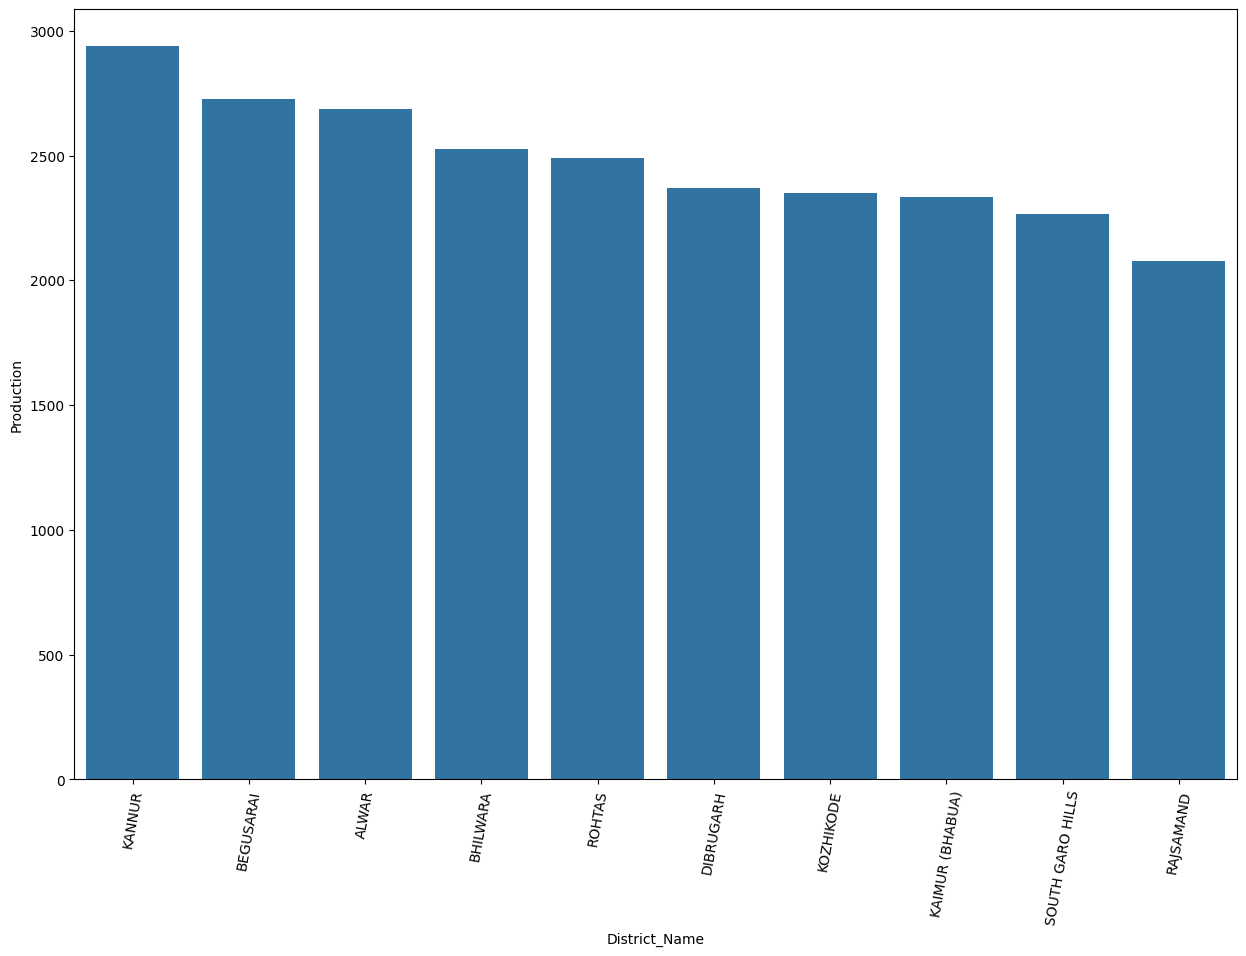

In [101]:
plt.figure(figsize=(15,10))
sns.barplot(x="District_Name",y="Production",data=rice_prod_dis.head(10))
plt.xticks(rotation=80)
plt.show()

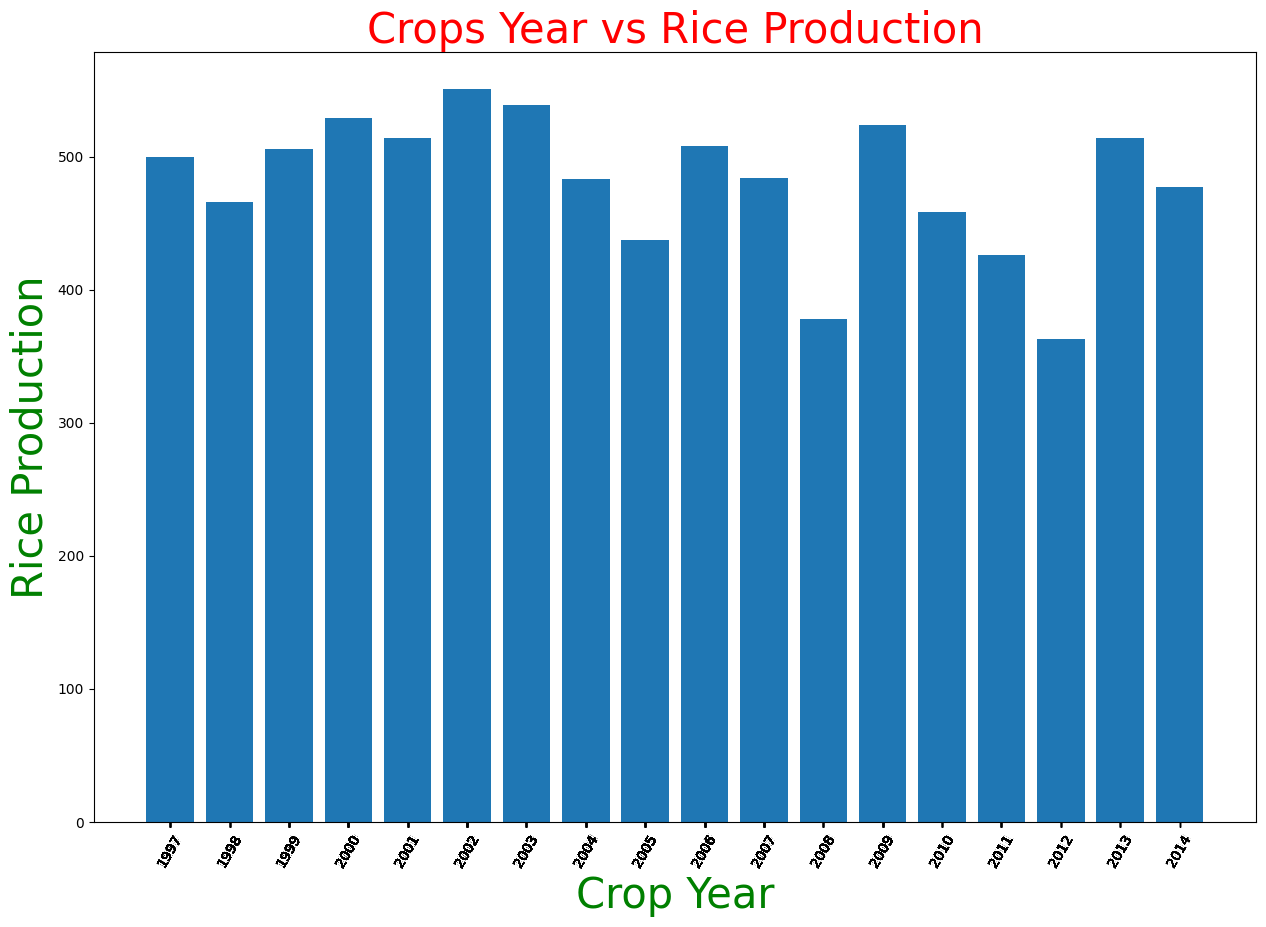

In [102]:
plt.figure(figsize= (15,10))
x= rice_df['Crop_Year']
y= rice_df["Production"]
plt.xticks(rice_df['Crop_Year'], rotation = 60)
plt.xlabel("Crop Year", fontsize = 30, color = 'g')
plt.ylabel("Rice Production", fontsize = 30, color = 'g')
plt.title('Crops Year vs Rice Production', fontsize = 30, color = 'r')
plt.bar(x,y)
plt.show()

2. Which states ranks high in area wise crop
production in India? Substantiate with facts and
Figures.


In [104]:
df_area = df.groupby('State_Name')['Area'].sum().reset_index().sort_values(by='Area',ascending =False)
df_area.head(10)

,State_Name,Area
30,Uttar Pradesh,1306987.0
16,Madhya Pradesh,1026660.0
14,Karnataka,1012417.0
22,Odisha,1004987.0
4,Bihar,883705.0
3,Assam,864909.0
6,Chhattisgarh,852763.0
17,Maharashtra,840931.0
27,Tamil Nadu,537926.0
25,Rajasthan,508589.0


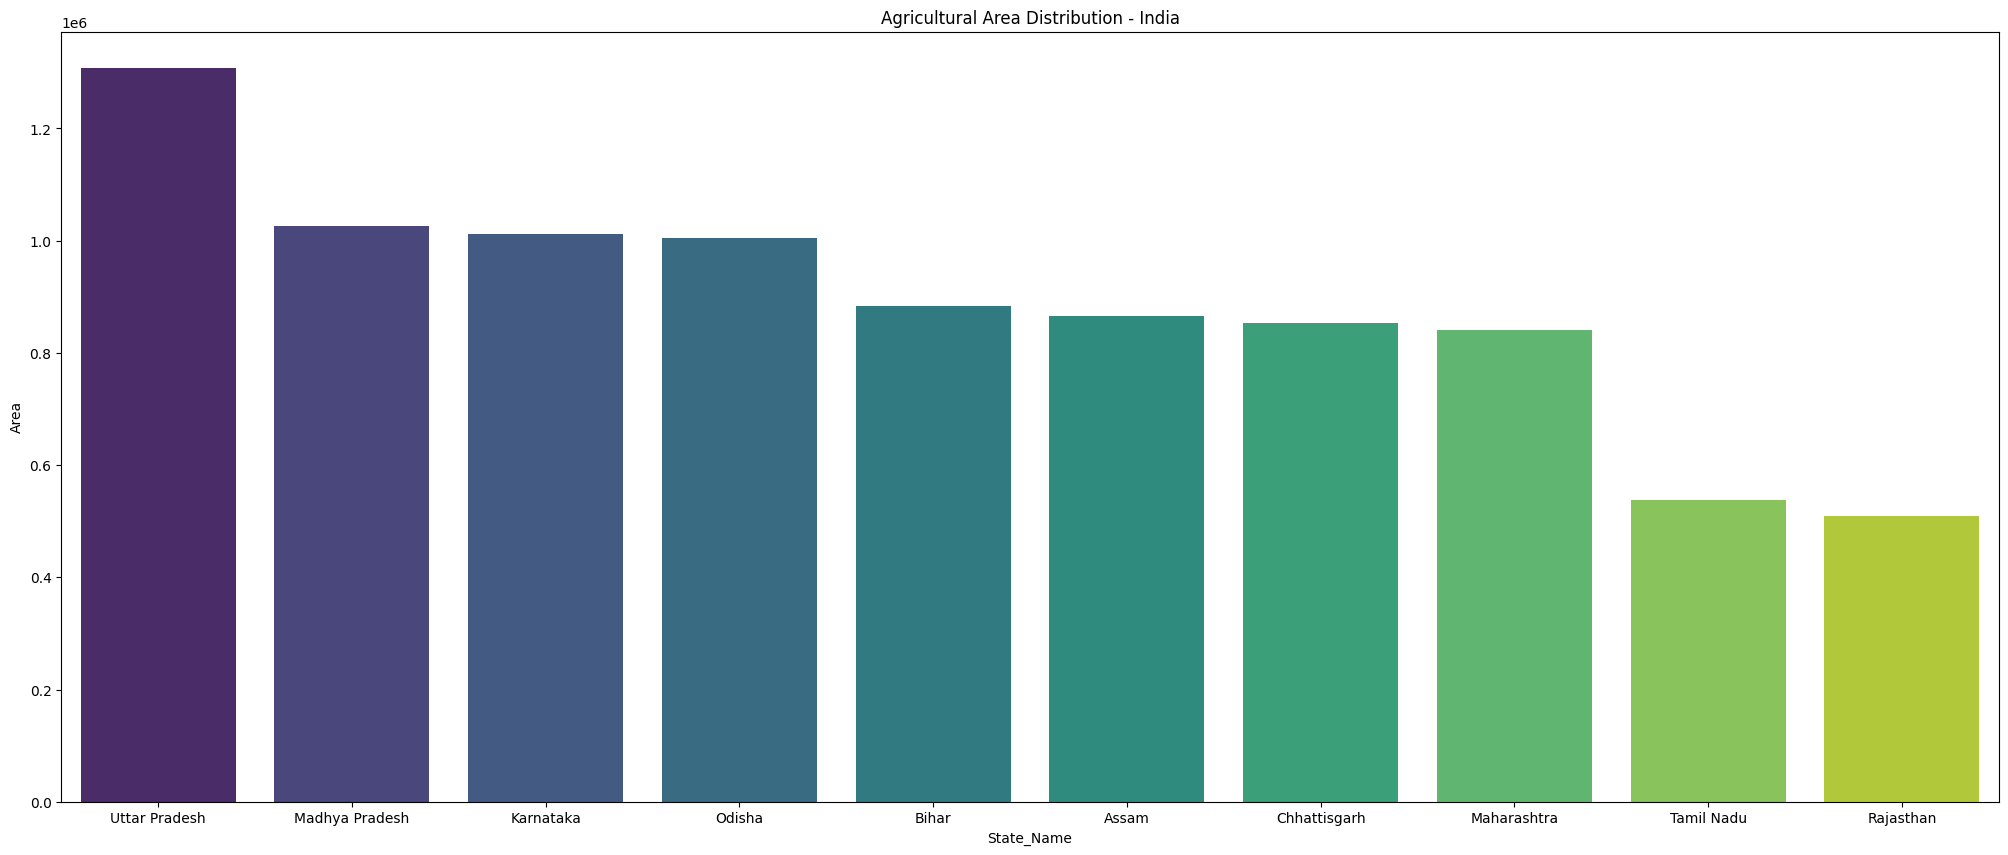

In [108]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x='State_Name', y='Area',data= df_area.head(10) ,errwidth=0 ,palette='viridis')
plt.title('Agricultural Area Distribution - India');

- Top cultivating states based on the Cultivation area are: Uttar Pradesh, Karnataka.

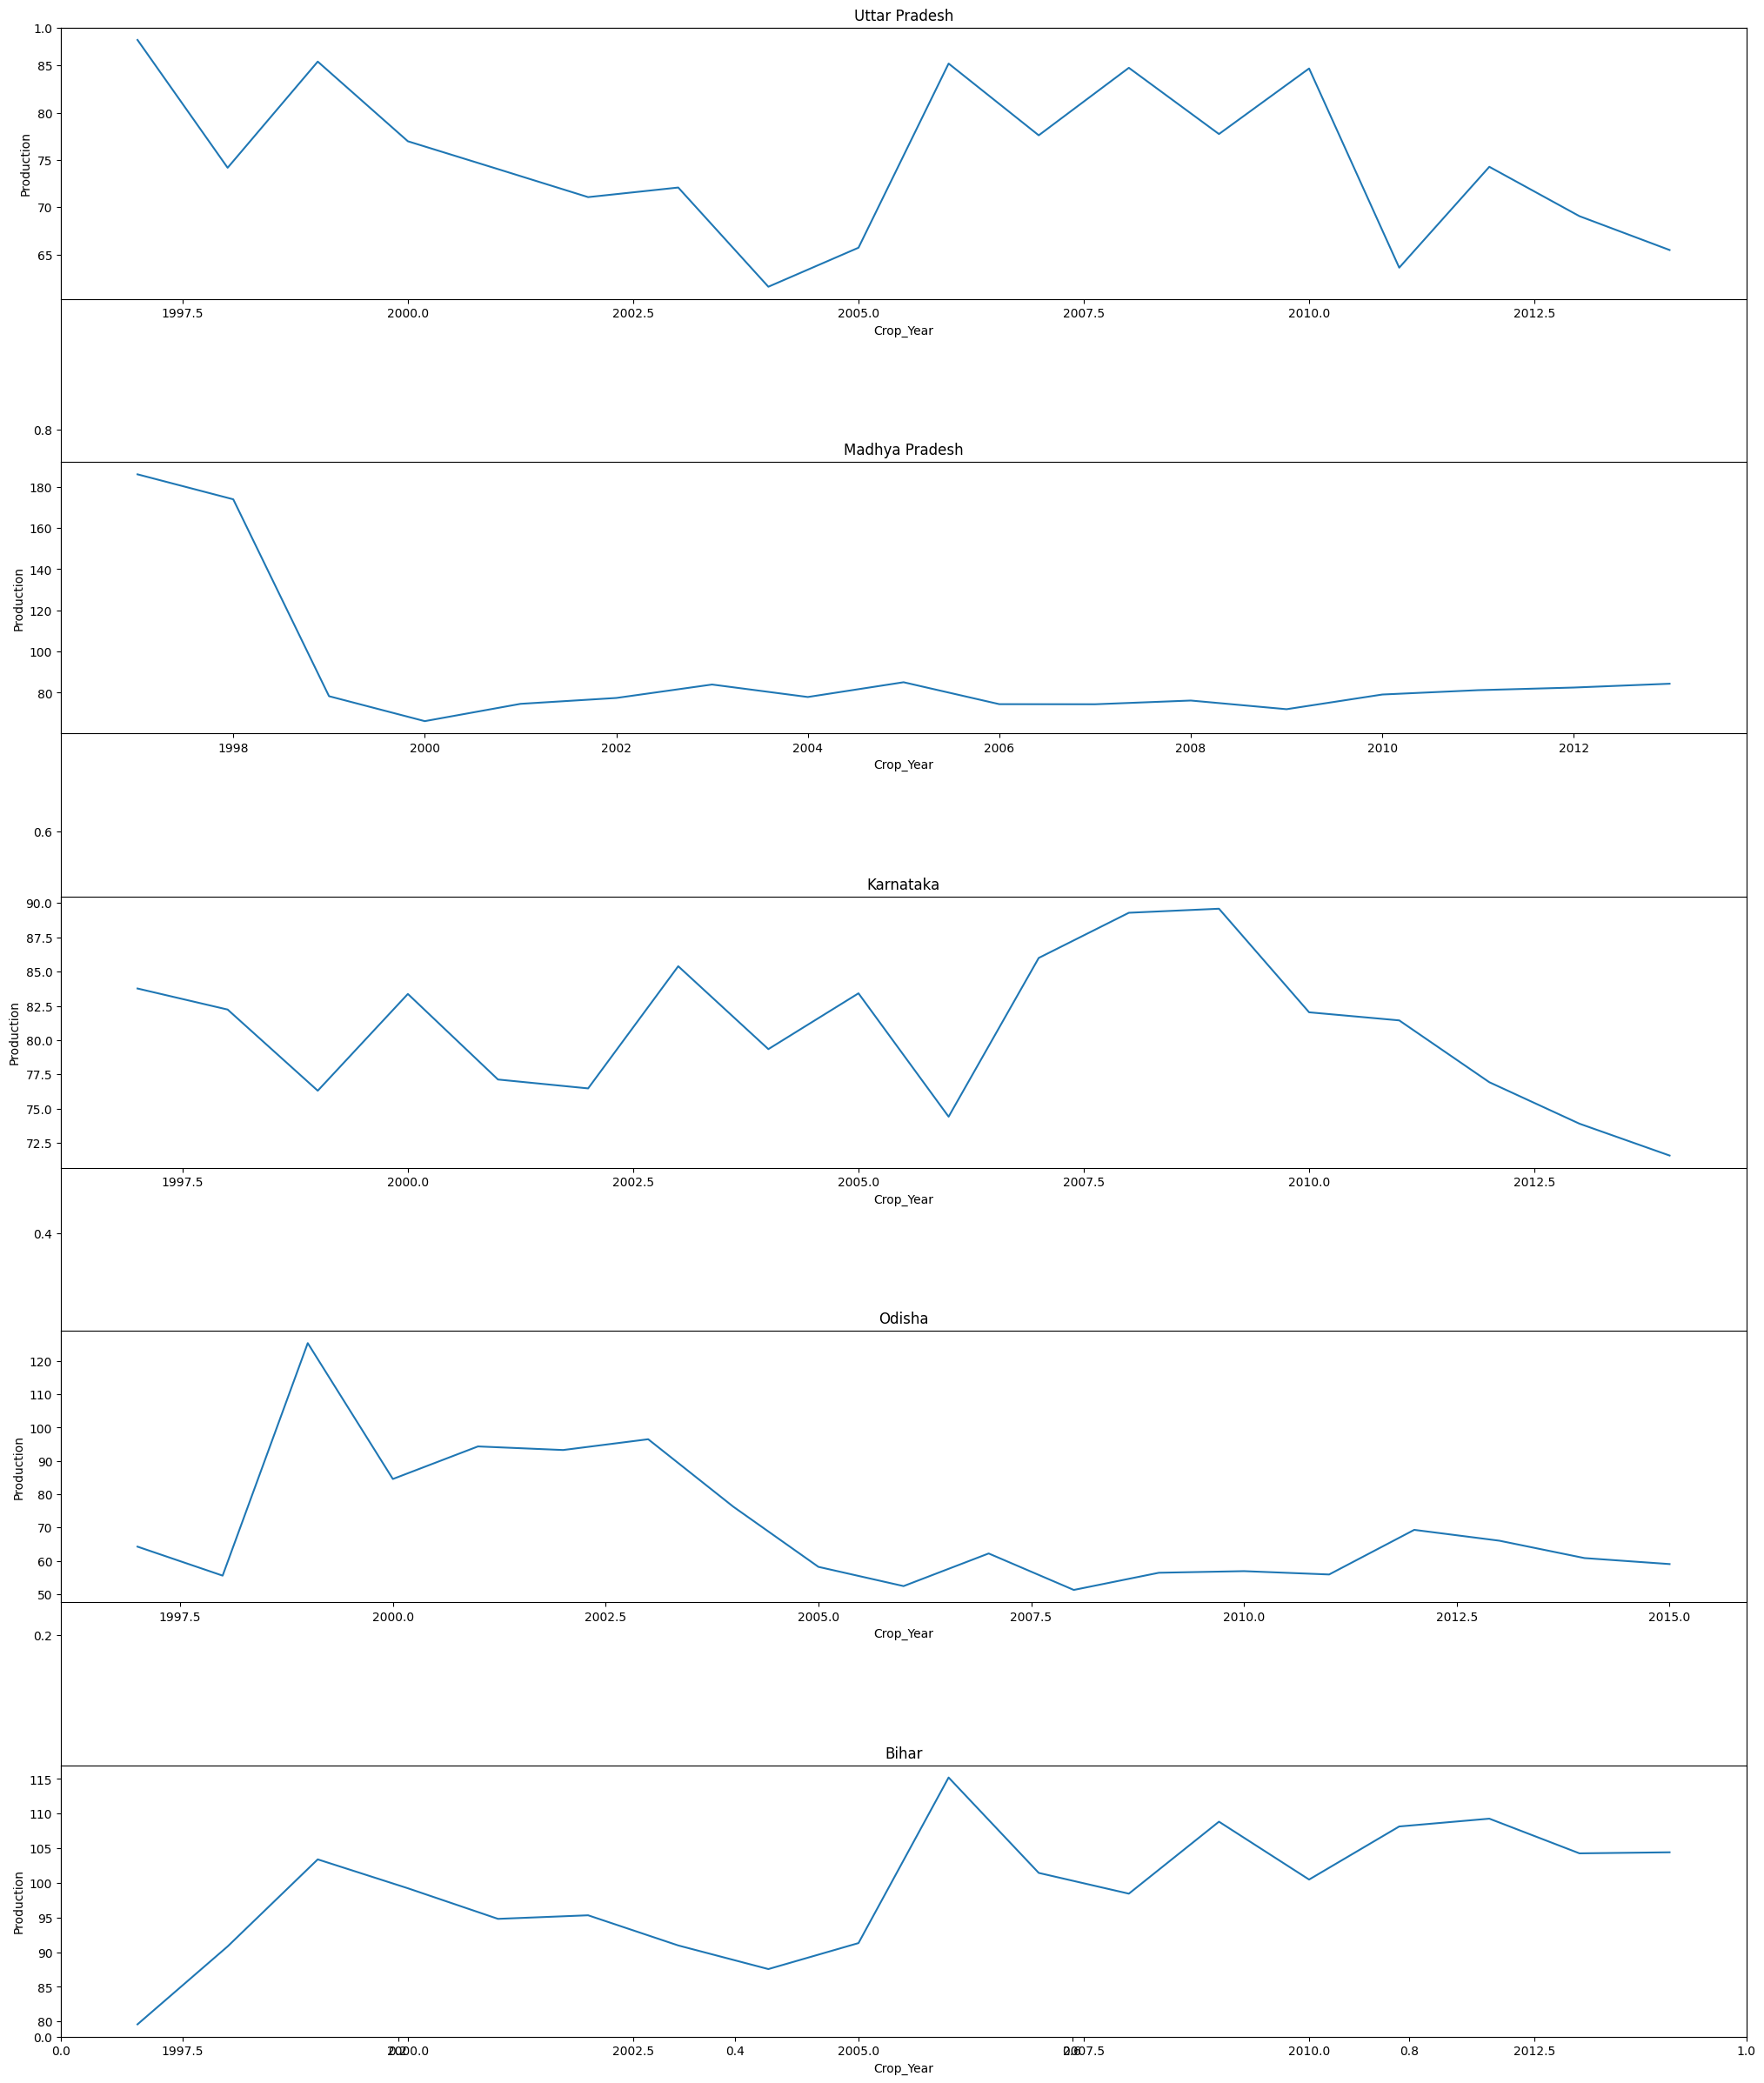

In [109]:
df_area_5 = df_area.head(5)
fig, ax = plt.subplots(figsize=(25,30), sharey='col')
count = 1
for state in df_area_5.State_Name.unique():
 plt.subplot(len(df_area_5.State_Name.unique()),1,count)
 sns.lineplot(x=df[df.State_Name==state]['Crop_Year'],y=df[df.State_Name ==state]['Production'], ci=None)
 plt.subplots_adjust(hspace=0.6)
 plt.title(state)
 count+=1;

Find the most efficient state (in terms of most
production per unit area). Also find the most efficient
state for some of the crop categories?

In [115]:
df['Production_per_unit_area'] =df['Production']/df['Area']
efficiency = df.groupby('State_Name')['Production_per_unit_area'].sum().reset_index().sort_values(by='Production_per_unit_area',ascending=False)
efficiency.head(10)


,State_Name,Production_per_unit_area
30,Uttar Pradesh,7555.397857
4,Bihar,6724.761595
16,Madhya Pradesh,4066.835592
3,Assam,3137.086045
22,Odisha,3036.688500
25,Rajasthan,2884.509504
14,Karnataka,2878.039562
32,West Bengal,2548.988231
6,Chhattisgarh,2416.116266
27,Tamil Nadu,1801.531616


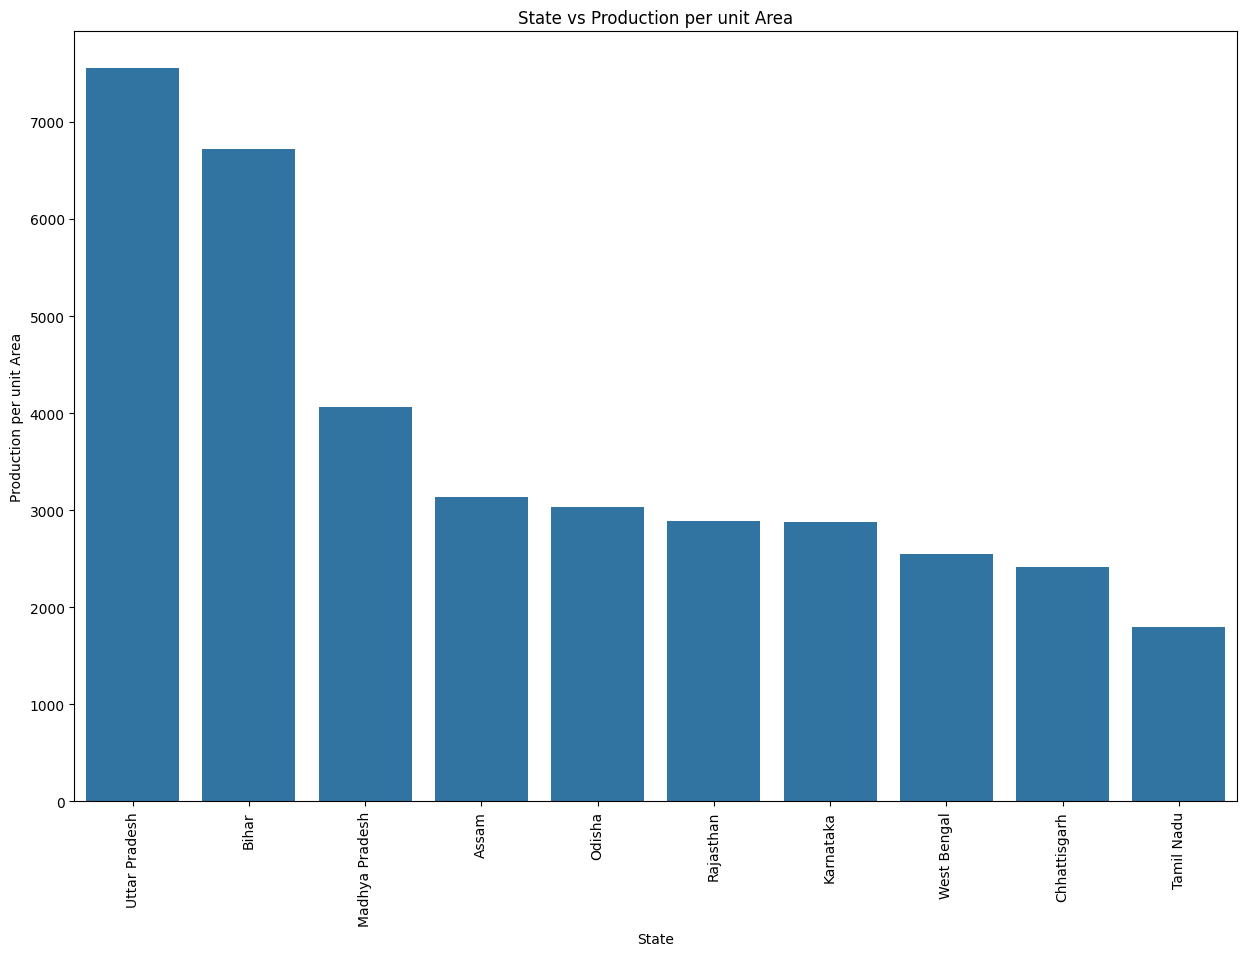

In [117]:
fig, ax = plt.subplots(figsize=(15,10))
a = sns.barplot(x='State_Name', y='Production_per_unit_area',data = efficiency.head(10))
plt.title('State vs Production per unit Area');
plt.xlabel("State")
plt.ylabel("Production per unit Area")
a.set_xticklabels(
 labels=efficiency.State_Name.head(10), rotation=90)
plt.show()

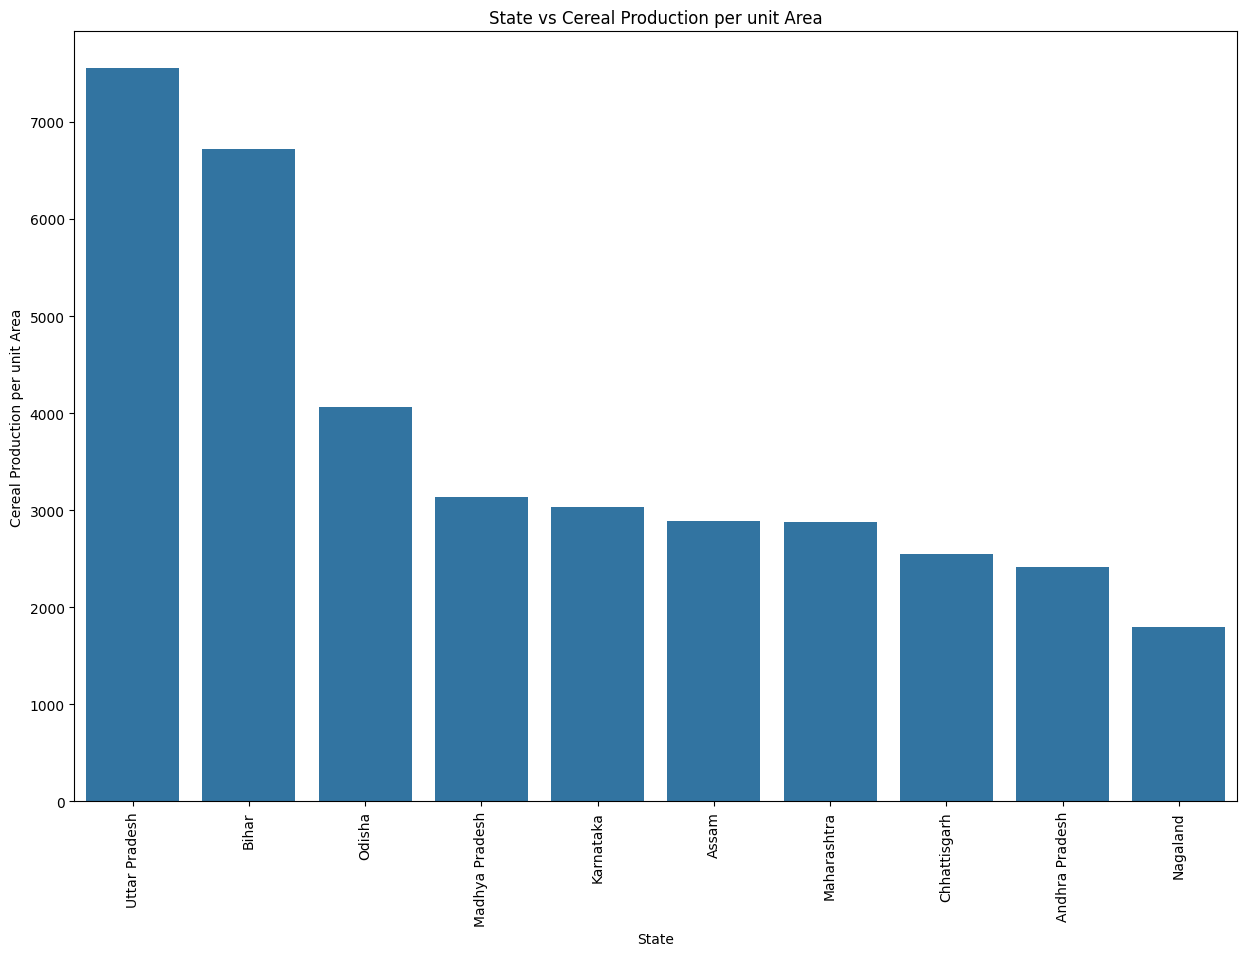

In [118]:
cereal_df = df[df["crop_category"]=="Cereal"]
efficiency_cereal = cereal_df.groupby('State_Name')['Production_per_unit_area'].sum().reset_index().sort_values(by='Production_per_unit_area',ascending=False)
efficiency_cereal.head(10)
fig, ax = plt.subplots(figsize=(15,10))
b = sns.barplot(x='State_Name', y='Production_per_unit_area',data = efficiency.head(10))
plt.title('State vs Cereal Production per unit Area');
plt.xlabel("State")
plt.ylabel("Cereal Production per unit Area")
b.set_xticklabels(
 labels=efficiency_cereal.State_Name.head(10), rotation=90)
plt.show()


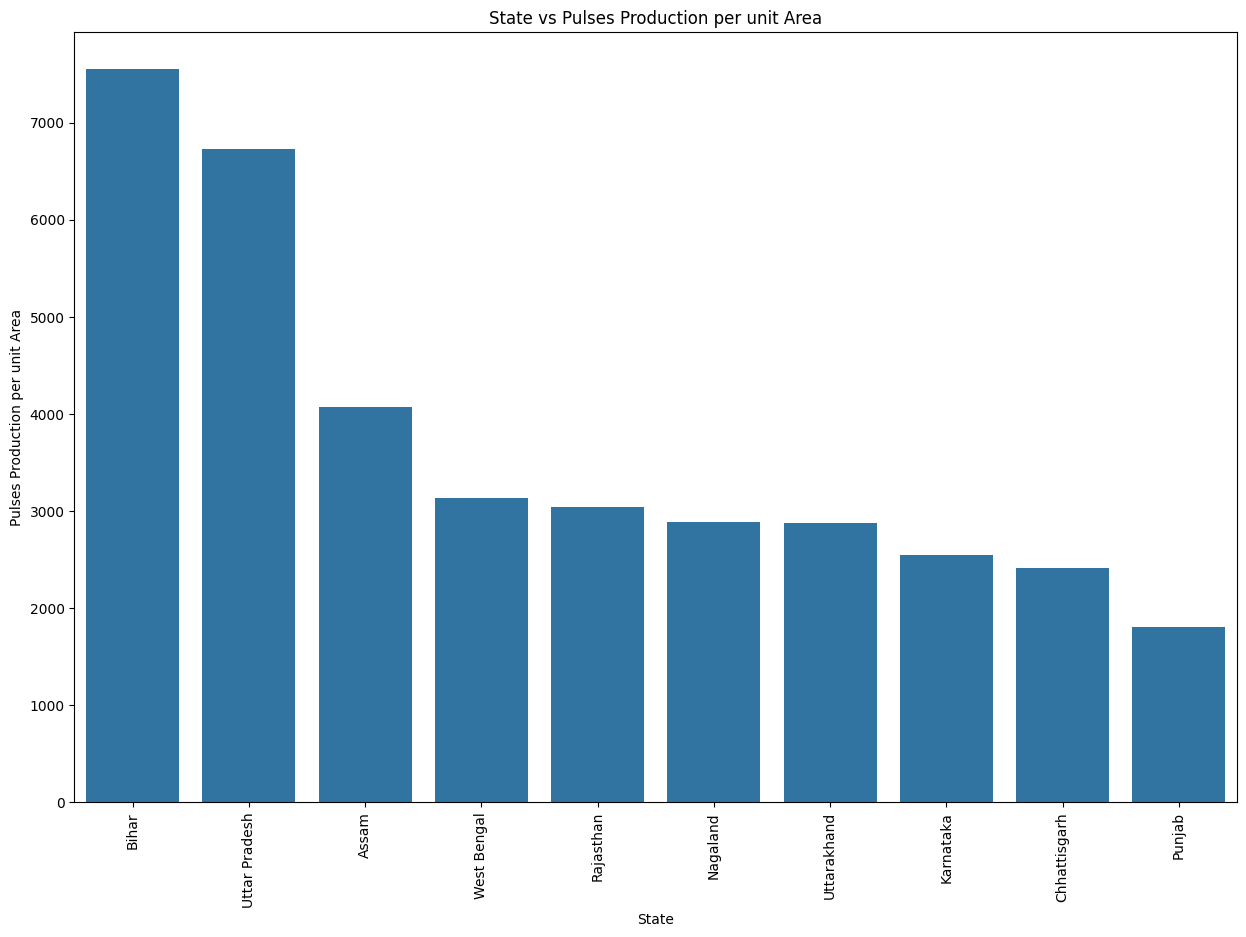

In [119]:
pulses_df = df[df["crop_category"]=="Pulses"]
efficiency_pulses = pulses_df.groupby('State_Name')['Production_per_unit_area'].sum().reset_index().sort_values(by='Production_per_unit_area',ascending=False)
efficiency_pulses.head(10)
fig, ax = plt.subplots(figsize=(15,10))
b = sns.barplot(x='State_Name', y='Production_per_unit_area',data = efficiency.head(10))
plt.title('State vs Pulses Production per unit Area');
plt.xlabel("State")
plt.ylabel("Pulses Production per unit Area")
b.set_xticklabels(
labels=efficiency_pulses.State_Name.head(10), rotation=90)
plt.show()

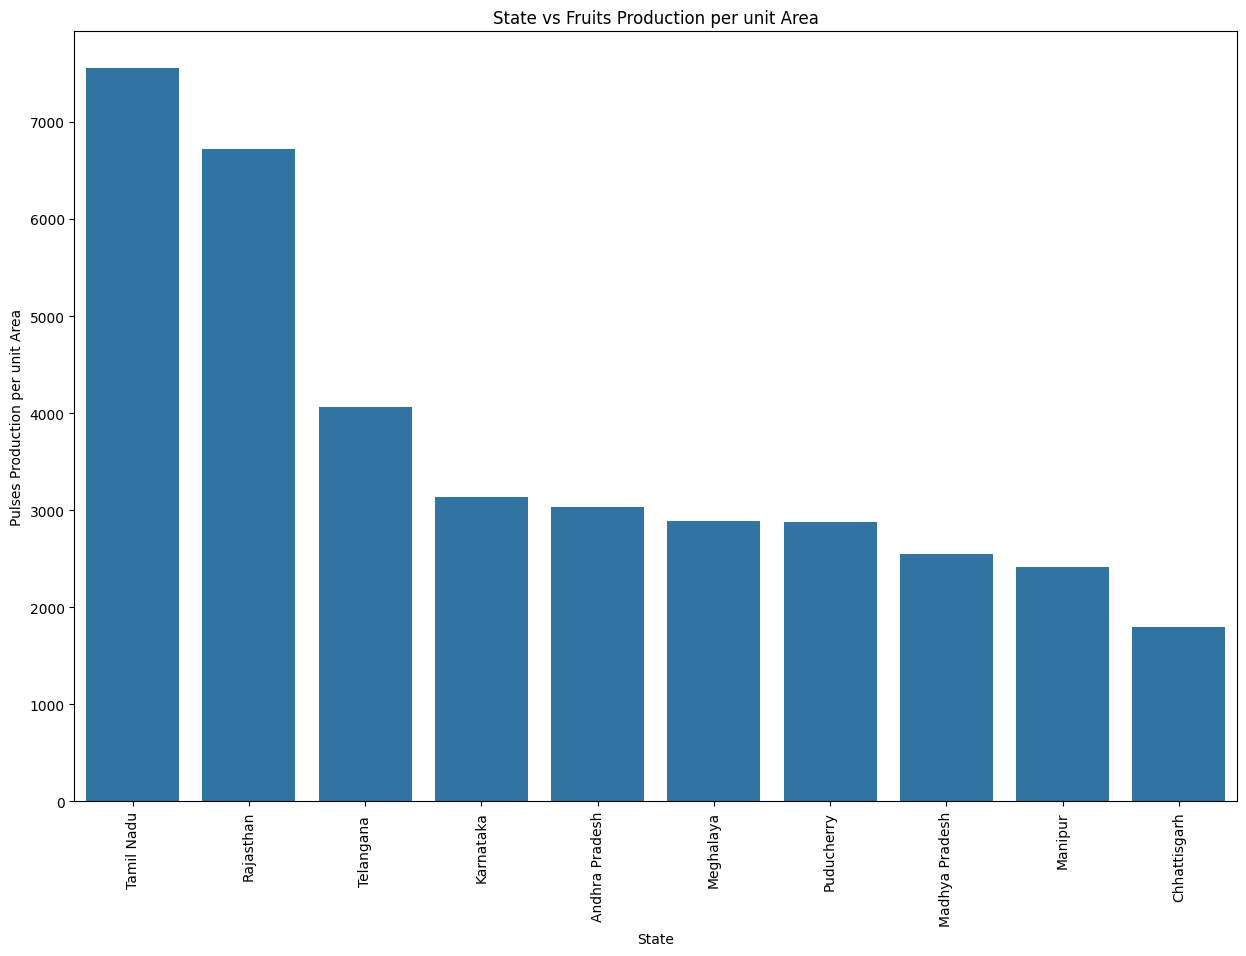

In [123]:
pulses_df = df[df["crop_category"]=="Fruits"]
efficiency_pulses = pulses_df.groupby('State_Name')['Production_per_unit_area'].sum().reset_index().sort_values(by='Production_per_unit_area',ascending=False)
efficiency_pulses.head(10)
fig, ax = plt.subplots(figsize=(15,10))
b = sns.barplot(x='State_Name', y='Production_per_unit_area',data = efficiency.head(10))
plt.title('State vs Fruits Production per unit Area');
plt.xlabel("State")
plt.ylabel("Pulses Production per unit Area")
b.set_xticklabels(
labels=efficiency_pulses.State_Name.head(10), rotation=90)
plt.show()

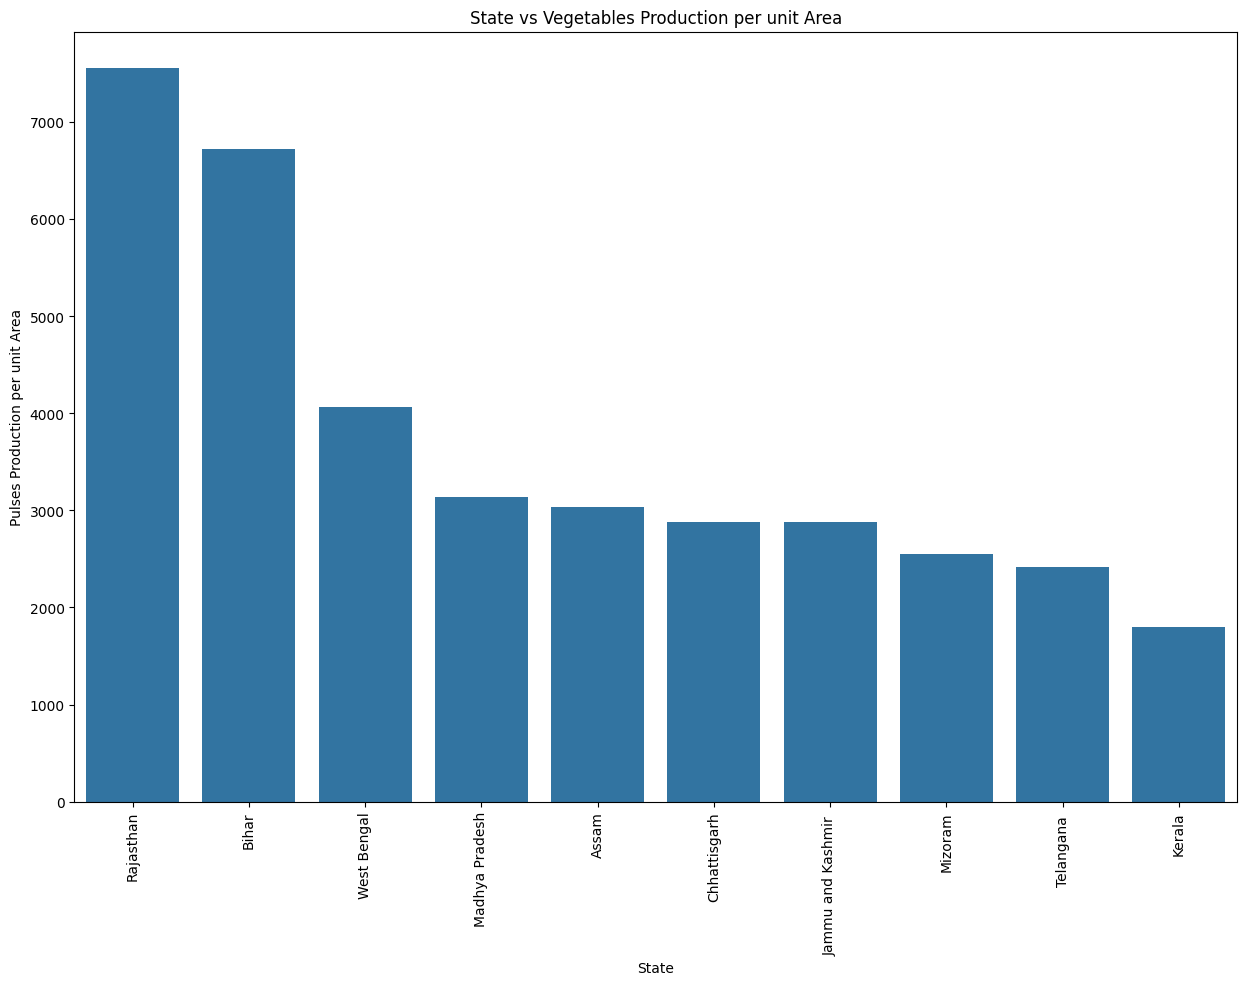

In [122]:
pulses_df = df[df["crop_category"]=="Vegetables"]
efficiency_pulses = pulses_df.groupby('State_Name')['Production_per_unit_area'].sum().reset_index().sort_values(by='Production_per_unit_area',ascending=False)
efficiency_pulses.head(10)
fig, ax = plt.subplots(figsize=(15,10))
b = sns.barplot(x='State_Name', y='Production_per_unit_area',data = efficiency.head(10))
plt.title('State vs Vegetables Production per unit Area');
plt.xlabel("State")
plt.ylabel("Pulses Production per unit Area")
b.set_xticklabels(
labels=efficiency_pulses.State_Name.head(10), rotation=90)
plt.show()

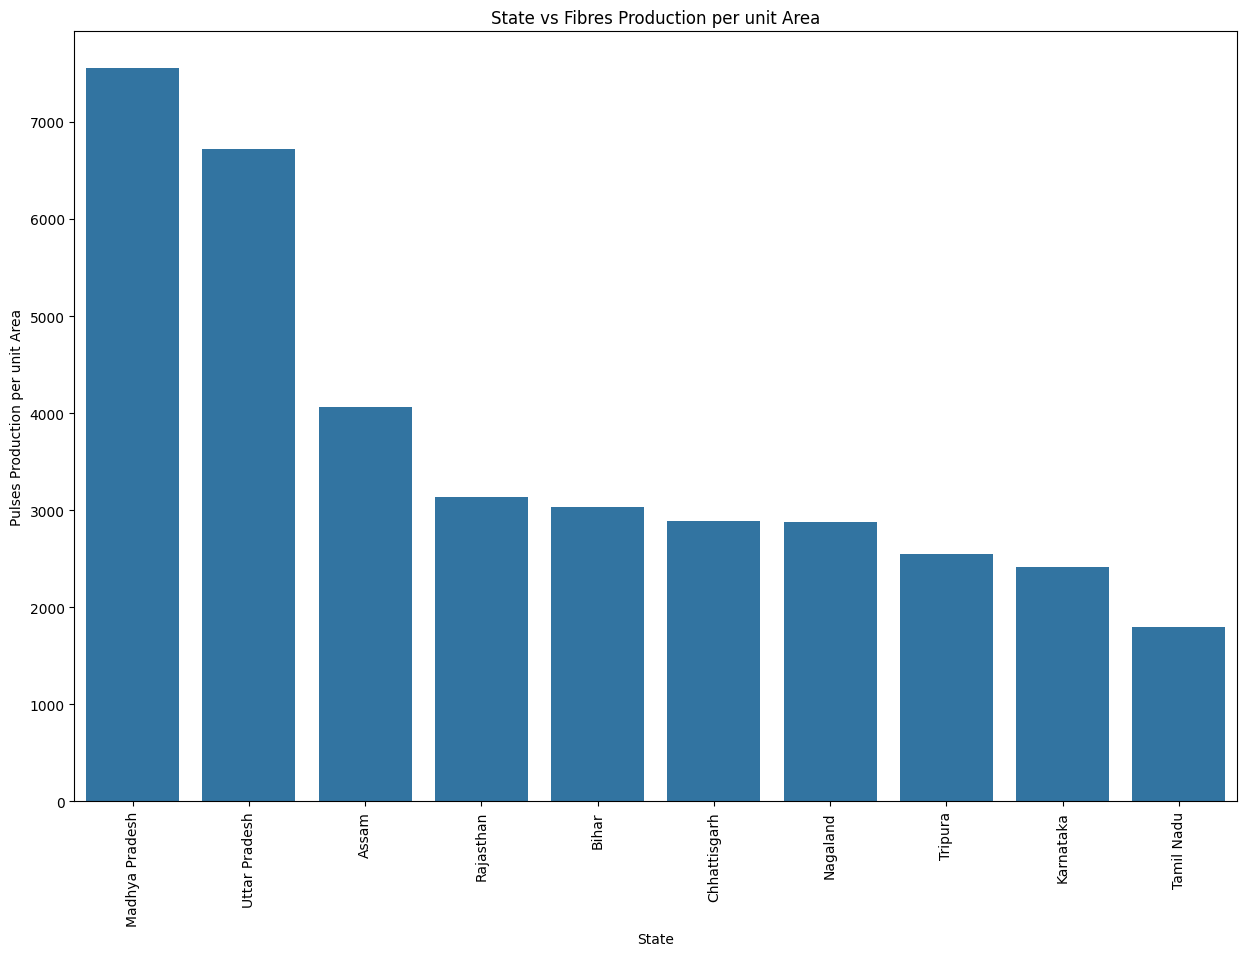

In [124]:
pulses_df = df[df["crop_category"]=="fibres"]
efficiency_pulses = pulses_df.groupby('State_Name')['Production_per_unit_area'].sum().reset_index().sort_values(by='Production_per_unit_area',ascending=False)
efficiency_pulses.head(10)
fig, ax = plt.subplots(figsize=(15,10))
b = sns.barplot(x='State_Name', y='Production_per_unit_area',data = efficiency.head(10))
plt.title('State vs Fibres Production per unit Area');
plt.xlabel("State")
plt.ylabel("Pulses Production per unit Area")
b.set_xticklabels(
labels=efficiency_pulses.State_Name.head(10), rotation=90)
plt.show()

Most efficieent states in terms of production per unit area for various categories of crops
are-
- Cereals - uttar pradesh
- Pulses - Bihar
- Fruits - Tamil Nadu
- Vegetables - Rajasthan
- Fibres - Madhya Pradesh

<h3>Inferences and Conclusion</h3>

We started with 246091 samples with 7 columns. Production Variable had 3730 (about
1.52% of total sample size) missing values which was dropped and working dataset has
242361 sample size. 

Univarate-Analysis
- State_Name - 33 Names including Union territories. Top states contributing to dataset
are Uttar Pardesh, Madhya Pradesh and Karnataka.
- Crop_Year - Dataset represents data for 19 years from 1997 to 2015 and maximum
data from 2003, 2002 & 2007.
- Season - We see six seasons with maximum data from Kharif, Rabi and Whole year.
- Crop - We data for 124 different crops with maximum data from Rice, Maize and
Moong(Green Gram).
- Area: Huge margin area used for production from 1 to 8580100 unit area. Distribution is
highly right skewed due to lot of outliers.
- Production value ranges from 0 to 1.25e+09 and Distribution is highly right skewed due
to lot of outliers.

New Variables created
- crop_category - 124 crops were divided into Cereal, Pulses, oilseeds, Vegetables,
spices, Nuts, Commercial, fibers, Beans, Fruits. Dateset shows top categories are
Cereal, Pulses and oilseeds.
- prod_per_unit_area - This variable was created as by dividing production with the area.
Visualisation of Data
1. State wise Production
2. Crop wise Production
3. Year wise Production
4. Season wise Production
5. Crop Category wise Production
6. Different Proportion of crop Categories

Questions and Answers
1. Which Crop is seen in high frequency and when and where is it grown in India?
Rice is seen to have more frequency.
Rice is grown majorly in Winter.
State wise Punjab dominates in rice production
District wise its BARDHAMAN(2.13%), MEDINIPUR WEST(1.8%) and WEST
GODAVARI(1.73%) which contributes to total rice production.
Year wise 2004 is the year when production reached the peak production.
2. Which states ranks high in area wise crop production in India? Substantiate with facts
and Figures.
Top cultivating states based on the Cultivation area are: Uttar Pradesh, Madhya
Pradesh, Maharashtra, Rajasthan and West Bengal.

Year wise trend of these states:
- Uttar Pradesh - High Production was seen in 2005 and after that it’s been
reducing gradually.
- Madhya Pradesh - 1998 showed a high production and then there was
gradual reduction but it picked up and 2012 also showed a peak in
Production.
- Maharashtra - Production went down drastically in 2006 and again the levels
went up and hit a high peak after 2007.
- Rajasthan - Production hit a all time low in the year 2002 and then picked up
by 2010.
- West Bengal - Production hit a peak around 2006 but it has hit a low after
2007 and never recovered back.
4. Find the most efficient state (in terms of most production per unit area). Also find the
most efficient state for some of the crop categories.
Most efficieent states in terms of production per unit area are - Puducherry, Kerala
and Punjab.
Most efficieent states in terms of production per unit area for various categories of
crops are:
- Cereals - uttar pradesh
- Pulses - Bihar
- Fruits - Tamil Nadu
- Vegetables - Rajasthan
- Fibres - Madhya Pradesh